# Proposal of a Machine Learning Project on Credit Scoring
Done by Matvey Khripach and Aleksandr Egoshin

For your convenience, here is a list of final amendments to the project.

**FINAL AMENDMENTS:**
- 2 new categorical features were engineered. Since we have created categorical variables (and there were none initially, the data transformation pipline has been amended accordingly. And so, all of the models have been retrained and revalidated.
- A few descriptive graphs have been added
- A stacking tecnique has been utilized with two sets of HPs tuned
- The leader model has been considered in bit more detail
- The duscussion of the results and further improvements were written 

# Mini-abstract
 **The Credit Scoring dataset has 11 explanotory variables describibng relevenat financial parameters of private borrowers. For our final project, we will use these data to develop a Machine Learning model to predict a probability that a person will experience a financial distress in the next two years. The main performance metric we will use is ROC-AUC (The receiver operating characteristic-Area Under the Curve) as a common tool used in binary classification.**

 **The data source:** Credit Fusion, Will Cukierski. (2011). Give Me Some Credit. Kaggle. https://kaggle.com/competitions/GiveMeSomeCredit
}

# Relevance of the topic and the goal of the project

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.

**Credit scoring algorithms, which make a guess at the probability of a default, are the method banks use to determine whether or not a loan should be granted.**

**The goal of our project is to train and validate a Machine Learning credit scoring algorithm, by predicting the probability that somebody will experience a financial distress in the next two years.**

The developed model be can used by banks to assist them in making better financial decisons.


###The main avantages of using the Mchine Learning approach to this problem are the following:
- **Greater Accuracy**

Machine learning models can handle high-dimensional, nonlinear, and interactive relationships between variables. They can leverage a large number of factors to improve the prediction of risk. These nuanced algorithms can lead to more accurate and reliable credit scores and decisions.
- **Enhanced Efficiency**

Machine learning algorithms can automate the credit scoring and decisioning processes, making models faster and more efficient. They can process large amounts of data in real time, providing instant credit scores and decisions. This can significantly reduce the time taken for loan approvals and increase customer satisfaction.
- **Reduction in Bias**

Machine Learning can help to reduce bias in credit scoring and decisioning. They can be trained to ignore variables that might lead to discriminatory practices, such as race, gender, and age. This can lead to fairer and more equitable credit decisions.
- **Big Data Utilization**

Vast amounts of data that banks collect and store about their clients can be utilized to train ML models exceptionally well
- **Extrapolation abilities**

Extrapolation ability of a properly selected ML algorithm to correctly handle a never seen before instance of data


###Our chosen project fits the definition of ML we duscussed during the lectures pretty well.
According to Tom Mitchell's definition: A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.
- **E** ---  The training, validation and test datasets presented below
- **T** ---  To predict a probability that a person will experience a financial distress in the next two years
- **P** --- ROC-AUC

We are going to pick and tune the best ML algorithm that effectively improves its performance given the relevant data.

### Applying the classification of ML techniques
Given the classification of ML techniques presenterd in class, we notice that our data fits **the Supervised models framework**.
Our **binary** dependent outcome variable of interst is  **SeriousDlqin2yrs** which  stands for whether or not a person experienced 90 days past due delinquency or worse. (Whether or not a person has not paid for his or her current liabilities after the due date for 90 days or more)  

# 1. Loading the data. Brief description.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'''Main'''
import pandas as pd
import numpy as np

'''Data Viz'''
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

'''Data Prep'''
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from category_encoders import WOEEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

'''Models'''
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm as lgb

'''HP Tuning'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

'''Metrics'''
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# df_train = pd.read_csv('/content/drive/MyDrive/Big Data & ML colab/data/cs-training.csv')
# df_train = pd.read_csv('/content/drive/MyDrive/ML/cs-training.csv').drop(['Unnamed: 0'], axis=1)
df_train = pd.read_csv('cs-training.csv').drop(['Unnamed: 0'], axis=1)
print(df_train.shape)
df_train.head()

(150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [4]:
# df_test = pd.read_csv('/content/drive/MyDrive/Big Data & ML colab/data/cs-test.csv').drop(['Unnamed: 0'], axis=1)
# df_test = pd.read_csv('/content/drive/MyDrive/ML/cs-test.csv').drop(['Unnamed: 0'], axis=1)
df_test = pd.read_csv('cs-test.csv').drop(['Unnamed: 0'], axis=1)
print(df_test.shape)

(101503, 11)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

**There is no data for the target variable in the testing data set, so we will not actually be able to use it. We will divide the Training data set into New Training, Validation and Test data sets instead.**

In [53]:
df = df_train

### Variable Name Description

- **SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age** Age of a borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse** Number of times a borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio** Monthly debt payments, alimony, living costs divided by monthly gross income
- **MonthlyIncome** in USD
- **NumberOfOpenCreditLinesAndLoans** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate** Number of times a borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines** Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse** Number of times a borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents** Number of dependents in family excluding themselves (spouse, children etc.)


We have noticed that **our variable of interst is a binary outcome variable**.
When dealing with such a case, there are several machine learning algorithms commonly used for prediction. Here are some of the most commonly used algorithms for binary classification tasks:

1. Logistic Regression

2. Decision Trees and Random Forest

3. Support Vector Machines (SVM)

4. K-Nearest Neighbors (KNN)

5. Naive Bayes

6. Neural Networks (Deep Learning)

7. Gradient Boosting Algorithms

8. Logistic Regression with Regularization

The choice of the most suitable algorithm will depend on the specific characteristics of our dataset, the complexity of the problem. It's often a good practice to try multiple algorithms and compare their performance using cross-validation to select the one that works best for our binary classification task.

**We are going to start with comparing the following three algorithms:**
- **Logistic Regression**

Logistic regression is a classic algorithm for binary classification. It models the probability of the binary outcome based on a linear combination of predictor variables and applies the logistic function to the result.

- **a Decision Tree** (most likely a Random Forest)

Decision trees can be used for binary classification by splitting the dataset into subsets based on feature values and creating a tree-like structure to make predictions. Random Forest is an ensemble method based on several decision trees.

- **a Gradient Boosting Algorithms**

In addition to decision trees, gradient boosting algorithms like XGBoost, LightGBM, and CatBoost can be used directly for binary classification tasks. They are known for their high predictive accuracy and robustness.

### Feature Engeneering
- Within the realm of machine learning projects, it is crucial to incorporate feature engineering and feature selection into the overall solution.

- Feature engineering encompasses the creation of new features, such as computing ratios, counts, or sums derived from the existing features. This process aids in empowering the machine learning algorithm to discern a more robust signal from the dataset.

Let's create a new feature 'HasIncome' to indicate weather a person earns something at all or not.

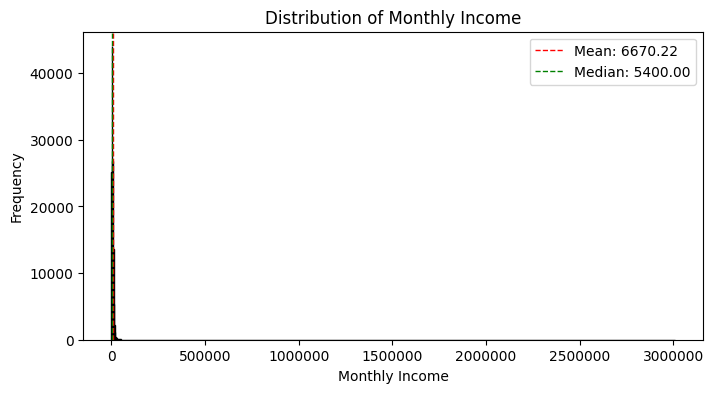

In [65]:
mean_val = np.mean(df['MonthlyIncome'])
median_val = np.median(df['MonthlyIncome'].dropna())
plt.figure(figsize=(8, 4))
plt.hist(df['MonthlyIncome'].dropna(), bins=1000, edgecolor='black')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.legend()
plt.show()

There're clearly some outliers, so let's filter this feature a see a distribution of the main portion of the observations.

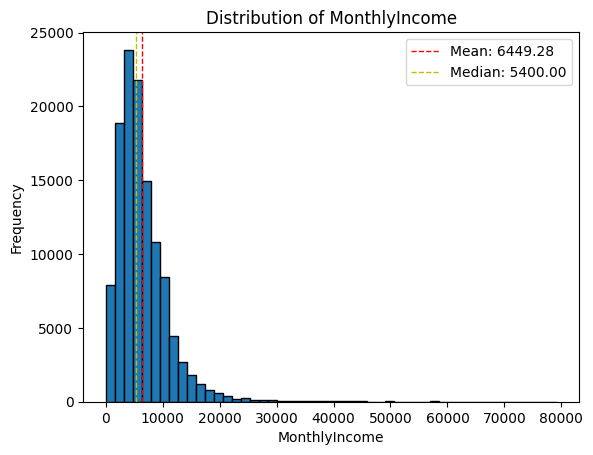

In [47]:
filtered_data = df[df['MonthlyIncome'] < 80000]['MonthlyIncome'].astype(float)
mean_val = np.mean(filtered_data)
median_val = np.median(filtered_data)
# Plot the histogram
plt.hist(filtered_data.dropna(), bins=50, edgecolor='black')
plt.title('Distribution of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='y', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.legend()
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.show()

In [6]:
# Define the bins and labels for the income categories
bins = [-1, 2000, 5000, 10000, 20000, 30000, 40000, 50000, float('inf')]
labels = ['Very Low Income', 'Low Income', 'Lower-Middle Income', 'Middle Income',
          'Upper-Middle Income', 'High Income', 'Very High Income', 'Exceptionally High Income']

# Create a new column 'IncomeCategory' to store the income category
df['IncomeCategory'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels)

In [7]:
df['HasIncome'] = df['MonthlyIncome'].apply(lambda x: 1 if x != 0 else 0)
df['HasIncome'].value_counts()

HasIncome
1    148366
0      1634
Name: count, dtype: int64

In [23]:
df['age'].isna().sum()

0

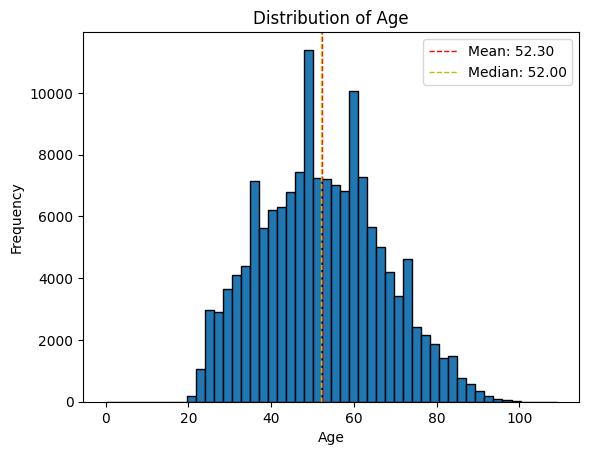

In [48]:
mean_val = np.mean(df['age'])
median_val = np.median(df['age'])
plt.hist(df['age'], bins=50, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='y', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.legend()
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.show()

In [8]:
# Define the bins for the age categories
bins = [0, 19, 29, 39, 49, 59, 69, float('inf')]
# Define the labels for the age categories
labels = ['Youth', 'Young Adults', 'Adults', 'Mature Adults', 'Senior Adults', 'Seniors', 'Elderly']

# Create a new column 'AgeCategory' to store the age category
df['AgeCategory'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomeCategory,HasIncome,AgeCategory
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,Lower-Middle Income,1,Mature Adults
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,Low Income,1,Mature Adults
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,Low Income,1,Adults
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,Low Income,1,Adults
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,Exceptionally High Income,1,Senior Adults


# 2. A few descriptive statistics and visualizatins of the main data features

In [26]:
df.describe().round(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,HasIncome
count,150000.000,150000.000,150000.000,150000.000,150000.000,120269.000,150000.000,150000.000,150000.000,150000.000,146076.000,150000.000
mean,0.067,6.048,52.295,0.421,353.005,6670.221,8.453,0.266,1.018,0.240,0.757,0.989
std,0.250,249.755,14.772,4.193,2037.819,14384.674,5.146,4.169,1.130,4.155,1.115,0.104
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.030,41.000,0.000,0.175,3400.000,5.000,0.000,0.000,0.000,0.000,1.000
50%,0.000,0.154,52.000,0.000,0.367,5400.000,8.000,0.000,1.000,0.000,0.000,1.000
75%,0.000,0.559,63.000,0.000,0.868,8249.000,11.000,0.000,2.000,0.000,1.000,1.000
max,1.000,50708.000,109.000,98.000,329664.000,3008750.000,58.000,98.000,54.000,98.000,20.000,1.000


The statistics for the Debt Ratio feature seem weird and will be assesed closer below.

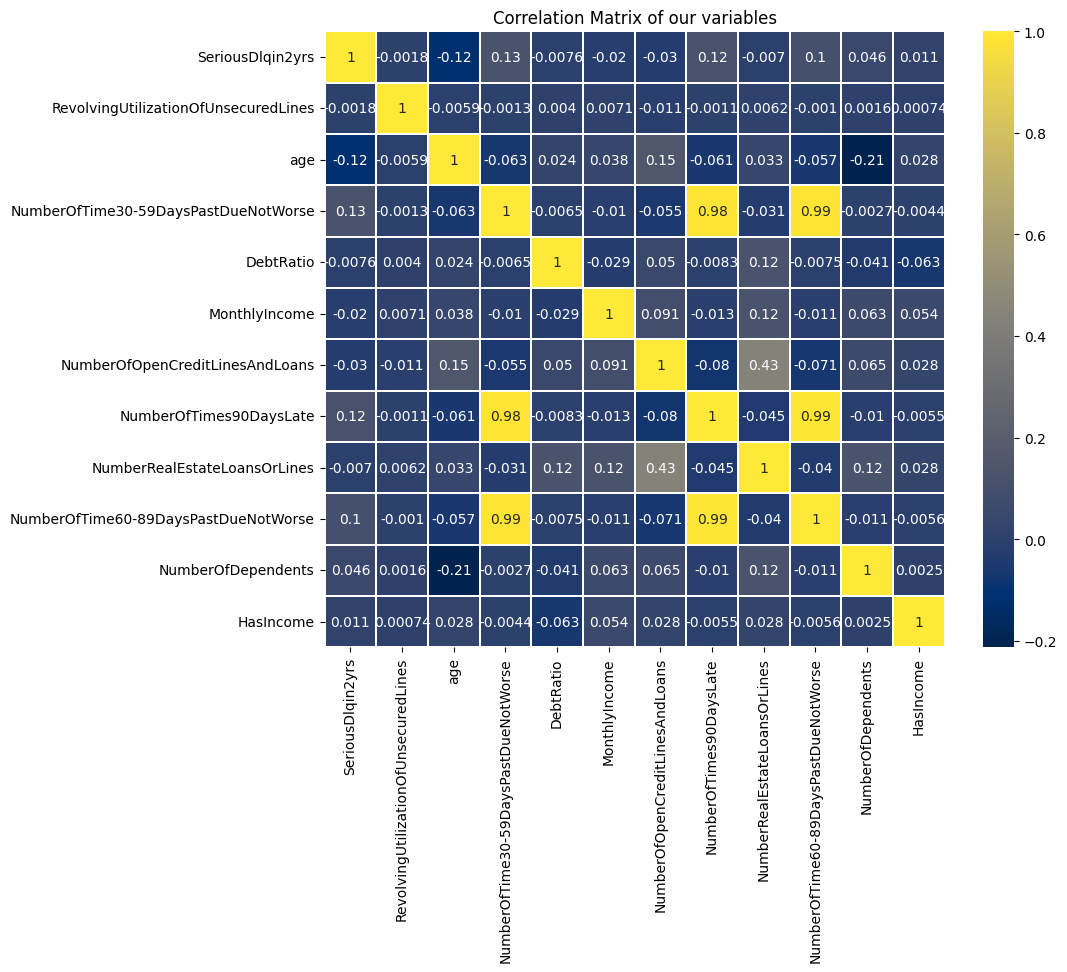

In [27]:
# Calculating the correlation matrix
correlation_matrix = df.corr()
# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=0.3)
plt.title('Correlation Matrix of our variables')
plt.show()

  It can be spot that Numbers of times a person experienced a financial distress are highly correlated between each other (between different lenghts of default periods) with correlation coefficients of 0.98 and 0.99. Generally, we want to avoid multicolliniarity as it increases variance of estimates in logistic regression. One possible way would be to wisely combine these numbers into one feature. But since these details add some granularity to the analysis, we will try to leave them as it is.  Other than that, Number of Open loans and credit lines is correlated with Number of real estate loans or credit lines (0.43).

  Some of the variables are slightly negatively correlated, such as Age and Number of Dependents.

There is some evidence of weak linear dependencies between the dependent variable and the regressors but mostly the relationship is expected to be non-linear.

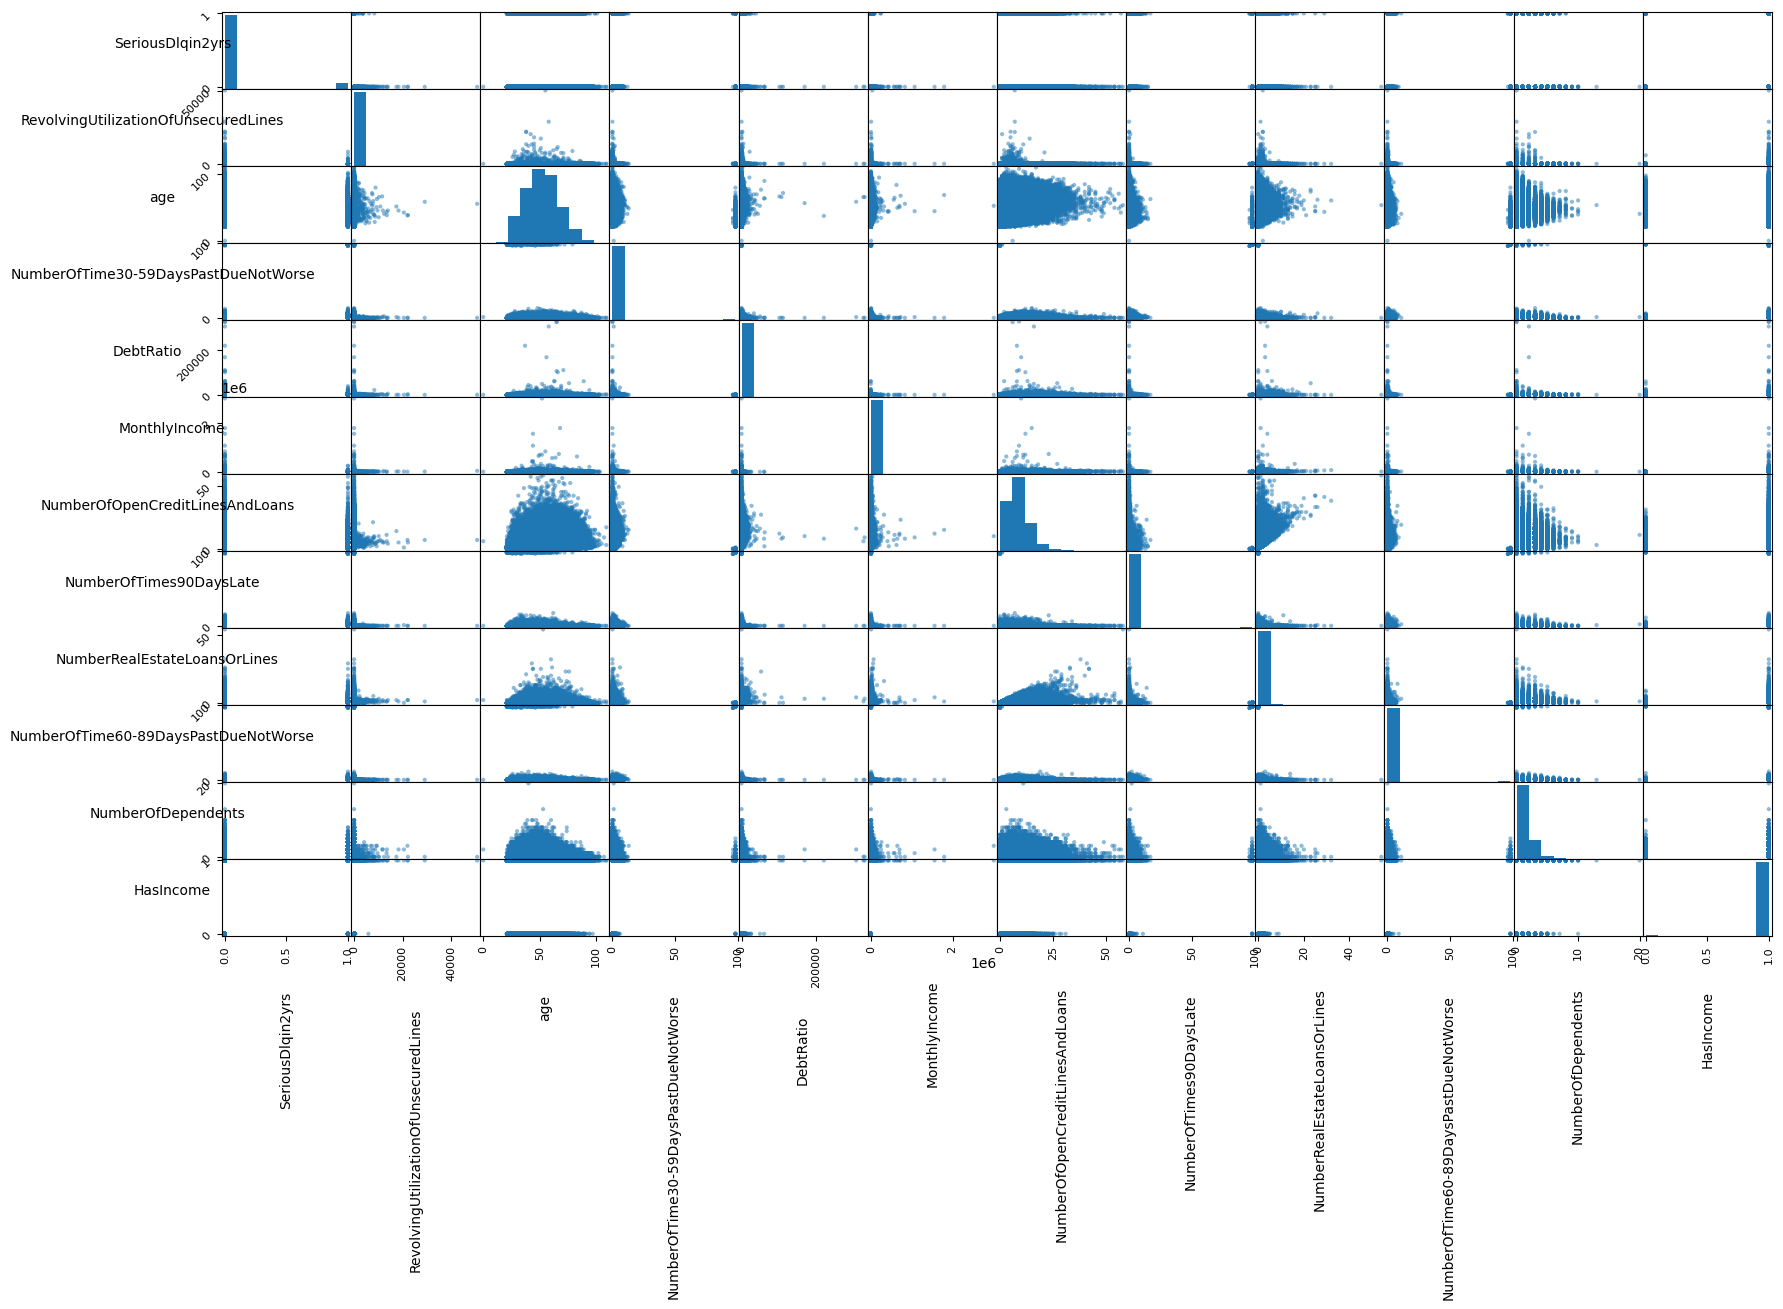

In [ ]:
# Get column names as a list
attributes = df.columns.tolist()
# Create a scatter matrix
scatter_matrix(df[attributes], figsize=(20, 12), diagonal='hist', grid=True, alpha=0.5)
# Rotate attribute names on the x-axis
for i, ax in enumerate(plt.gcf().axes):
    ax.xaxis.set_tick_params(rotation=90)
    ax.xaxis.label.set_rotation(90)
    ax.xaxis.labelpad = 20
# Rotate attribute names on the y-axis
for i, ax in enumerate(plt.gcf().axes):
    ax.yaxis.set_tick_params(rotation=45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.labelpad = 20
plt.show()

### Looking at the null values

In [28]:
null_val_sums = df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(df) })

,Column,Number of Null Values,Proportion
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [54]:
# Calculating the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filtering out columns with a high percentage of missing values (threshold: 20%)
high_missing_columns = missing_percentage[missing_percentage > 10].index.tolist()

# Displaying columns with a high percentage of missing values
print(high_missing_columns, missing_percentage[high_missing_columns])

['MonthlyIncome', 'IncomeCategory'] MonthlyIncome     19.820667
IncomeCategory    19.820667
dtype: float64


The distribution of Monthly Income is highly skewed. Based on this distribution, imputation using the median might be more appropriate than the mean, as the median is less affected by skewness.
For the other columns with missing values, a similar approach can be applied: evaluate the distribution and decide whether to use mean, median, or mode for imputation.
But to save our time we will use Median value for NA imputation.

##### The overall proportion of people who defaulted on their debt

In [ ]:
mean_dlq = df.SeriousDlqin2yrs.mean()
mean_dlq

0.06684

Proportion of People Who Defaulted: 0.06684


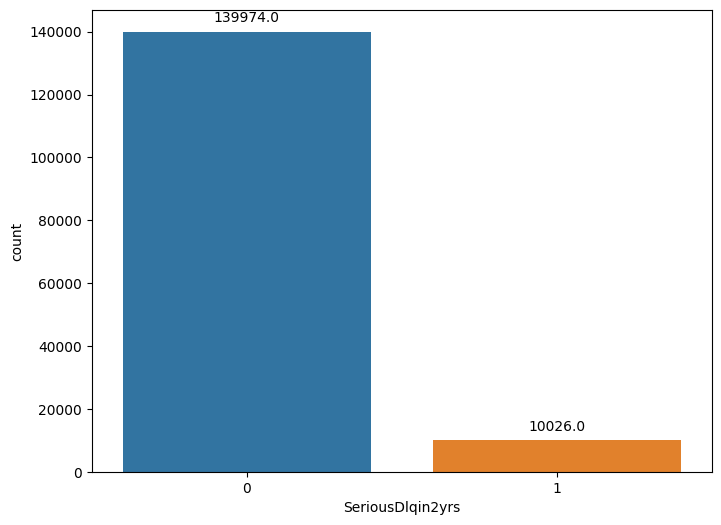

In [49]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="SeriousDlqin2yrs", data=df)
# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
print("Proportion of People Who Defaulted: {}".format(df["SeriousDlqin2yrs"].sum() / len(df)))
plt.show()

Let us look at the ages of people in the data, and how many of them defaulted in each bracket

<Axes: xlabel='age', ylabel='Count'>

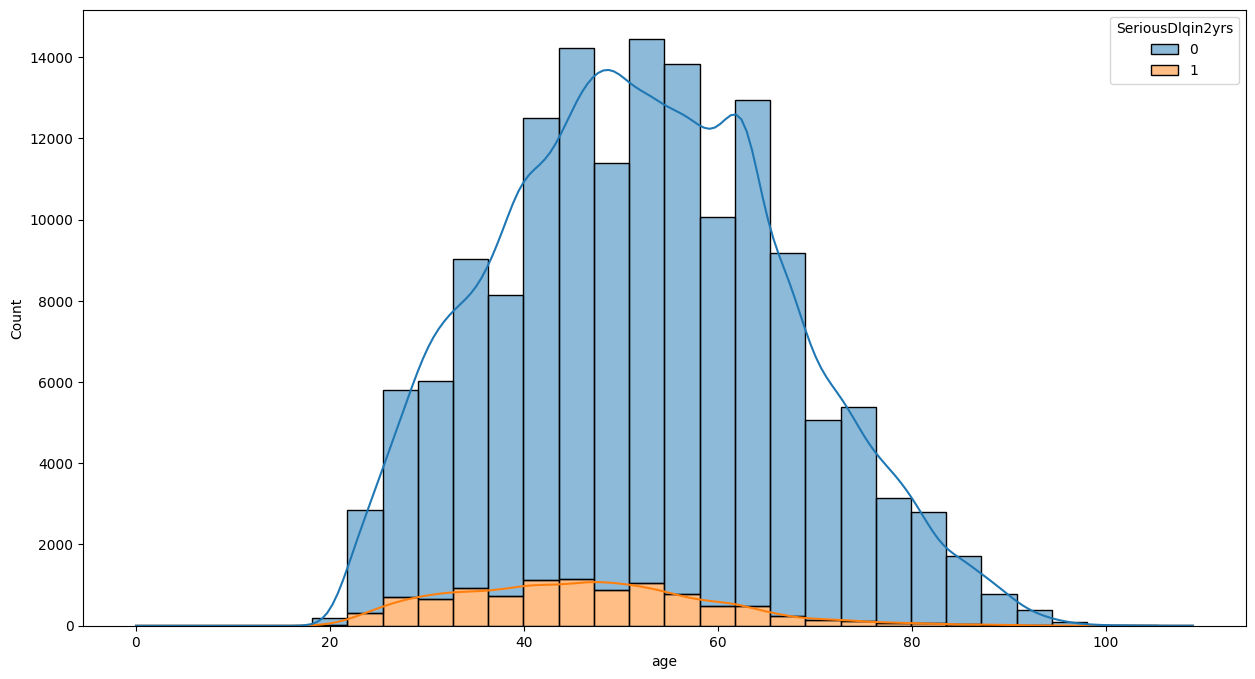

In [ ]:
filter_data = df.dropna(subset=['age'])
plt.figure(figsize=(15,8))
sns.histplot(filter_data, x = "age", multiple='stack', hue='SeriousDlqin2yrs', bins = 30, kde = True)

Some more info on default statistics

<Axes: xlabel='NumberOfDependents', ylabel='Count'>

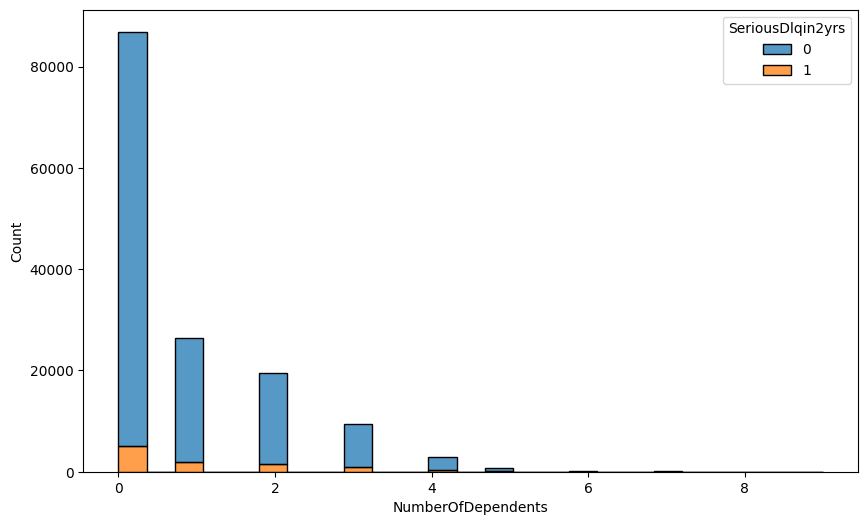

In [51]:
filter_data = df.dropna(subset=['NumberOfDependents'])
# filter_data = filter_data.loc[filter_data['SeriousDlqin2yrs'] ==True]
filter_data = filter_data.loc[filter_data['NumberOfDependents'] < 10] # There are no defaulters with dependents more then 10, and those seem like outliers anyway
plt.figure(figsize=(10,6))
sns.histplot(filter_data, x = "NumberOfDependents", multiple='stack', hue='SeriousDlqin2yrs', bins = 25)

Doesn't tell us much, let's look at the ratios of default across number of dependents

In [ ]:
filter_data = df.dropna(subset = ['NumberOfDependents'])
dependents = sorted(list(set(filter_data['NumberOfDependents'].to_list())))
ratio_list = []
for i in dependents:
    defaulted = filter_data.loc[(filter_data['NumberOfDependents'] == i) & (filter_data['SeriousDlqin2yrs'] == True)].count()[0]
    cleared = filter_data.loc[(filter_data['NumberOfDependents'] == i) & (filter_data['SeriousDlqin2yrs'] == False)].count()[0]
    ratio_list.append(defaulted / cleared)
print (ratio_list)

[0.062280733922524964, 0.07936507936507936, 0.08830415876909355, 0.09680777238029147, 0.11578947368421053, 0.10029498525073746, 0.1791044776119403, 0.10869565217391304, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0]


<Axes: >

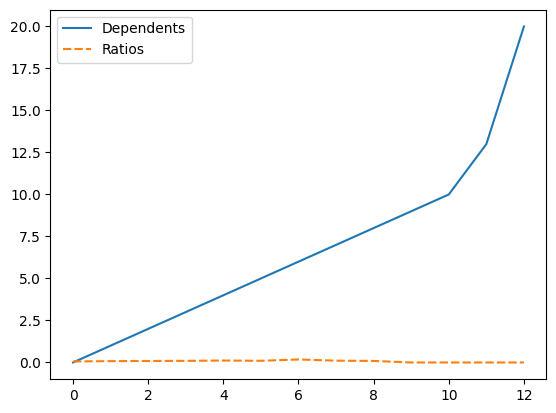

In [ ]:
# ratio_data = np.array([dependents, ratio_list])
d = {"Dependents": dependents, "Ratios" : ratio_list}
ratio_data = pd.DataFrame(d)
sns.lineplot(ratio_data)

Interestengly, we can observe that the ratio of defaults stays abot the same throughout number of dependents.

In [ ]:
filter_data = df.dropna(subset)

Now let's look at the number of open loans. We see that many people have 8-10 open loans, but there is a rather long tail which indicates people with a lot of credits

<ipython-input-23-fa9443a038c3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["NumberOfOpenCreditLinesAndLoans"])


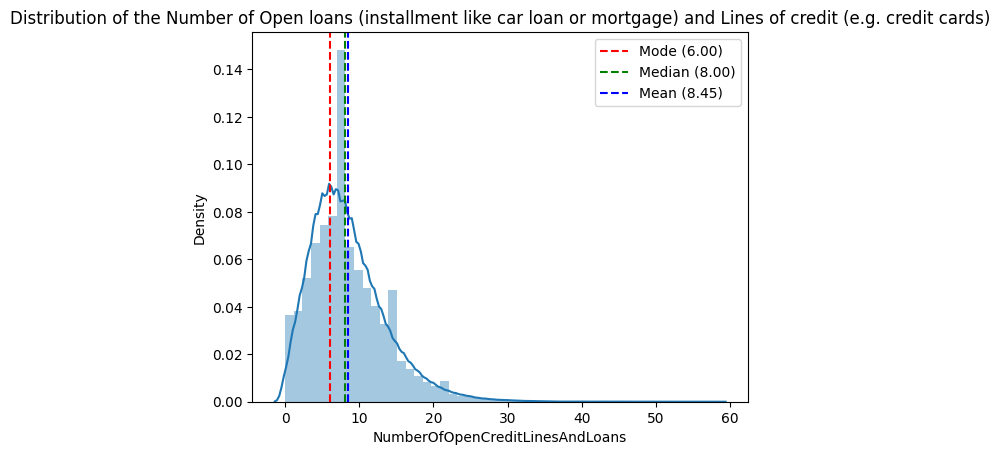

In [ ]:
sns.distplot(df["NumberOfOpenCreditLinesAndLoans"])
# Calculate the mode, median, and mean
mode_value = df["NumberOfOpenCreditLinesAndLoans"].mode().iloc[0]
median_value = df["NumberOfOpenCreditLinesAndLoans"].median()
mean_value = df["NumberOfOpenCreditLinesAndLoans"].mean()
# Add vertical lines for mode, median, and mean
plt.axvline(mode_value, color='r', linestyle='--', label=f'Mode ({mode_value:.2f})')
plt.axvline(median_value, color='g', linestyle='--', label=f'Median ({median_value:.2f})')
plt.axvline(mean_value, color='b', linestyle='--', label=f'Mean ({mean_value:.2f})')
# Add a legend and title
plt.title('Distribution of the Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)')
plt.legend()
plt.show()

The Mode is 6.0, the Median is 8.0 and the Mean is 8.45. So, this sample distibution is positively skewed.

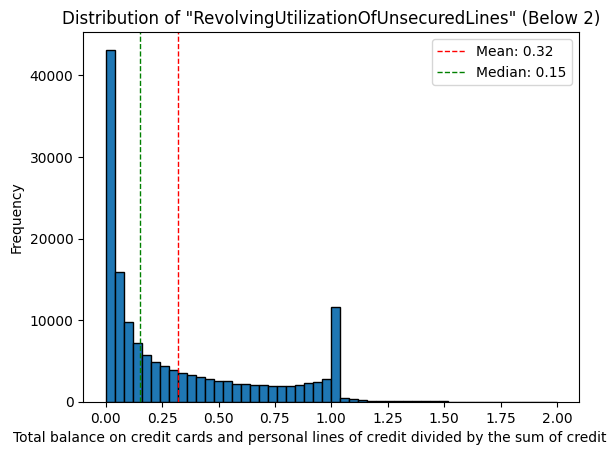

In [52]:
# Filter the data to include only MonthlyIncome below 2
filtered_data = df[df["RevolvingUtilizationOfUnsecuredLines"] < 2]["RevolvingUtilizationOfUnsecuredLines"]
mean_val = np.mean(filtered_data)
median_val = np.median(filtered_data)
plt.hist(filtered_data, bins=50, edgecolor='black')
plt.title('Distribution of "RevolvingUtilizationOfUnsecuredLines" (Below 2)')
plt.xlabel("Total balance on credit cards and personal lines of credit divided by the sum of credit limits")
plt.ylabel('Frequency')
plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.legend()
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.show()

In [ ]:
# Value counts of Number of times a borrower has been 90 days or more past due.
df["NumberOfTimes90DaysLate"].value_counts().sort_values(ascending=False)

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

### Let us look at some interesting aspects of these data

First of all, we should identify some issues with the data, if there are any.

In [53]:
df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Looking at the debt ratio, it is a bit strange to see that there is someone who is in debt over 330 000 times more than what he owns. Maybe it is an extreme outlier.

In [54]:
df.DebtRatio.quantile([.975])

0.975    3489.025
Name: DebtRatio, dtype: float64

It appears that there are around 2.5% of the data points have such extreme debt ratios of 3489.025 or higher.

In [55]:
df.DebtRatio.quantile([.8])

0.8    4.0
Name: DebtRatio, dtype: float64

And bount 20% of the people have the debt ratio of 4 or higher.

There are proabably some anomalies with the amount of Monthly Income recorded.

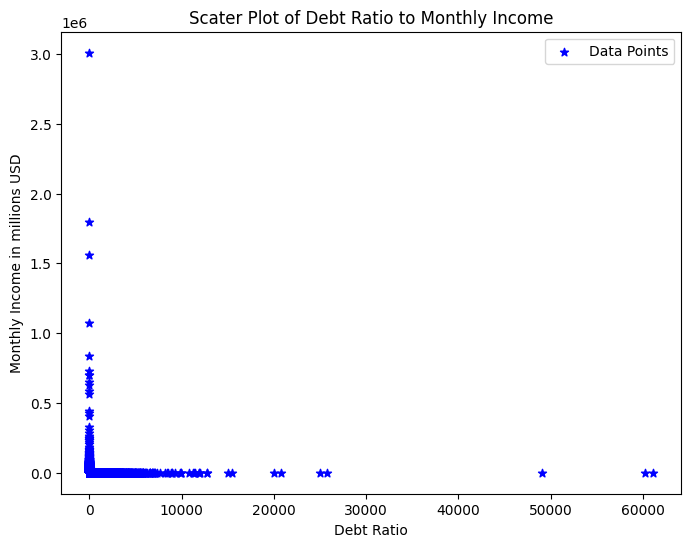

In [56]:
plt.scatter(df['DebtRatio'], df['MonthlyIncome'], label='Data Points', color='blue', marker='*')
plt.xlabel('Debt Ratio')
plt.ylabel('Monthly Income in millions USD')
plt.title('Scater Plot of Debt Ratio to Monthly Income')
plt.legend()
plt.gcf().set_size_inches(8, 6)
plt.show()

In [57]:
df[df['DebtRatio'] > 3489.025][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3750.000000,185.000000
mean,0.064267,0.064865
std,0.245260,0.246956
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


**Moreover, these people also have no income. It appears there have been some data collection error, so it would be best to exclude those observations from the model.**

In [9]:
removed_debt_outliers = df.drop(df[df['DebtRatio'] > 3489.025].index)
removed_debt_outliers.shape

(146250, 14)

In [59]:
removed_debt_outliers.median().values # Might be useful for dealing with NAs in Validation and Test sets

array([0.00000000e+00, 1.52343524e-01, 5.20000000e+01, 0.00000000e+00,
       3.55984819e-01, 5.40000000e+03, 8.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00])

The data are still very scewed. Let's explore them a bit.

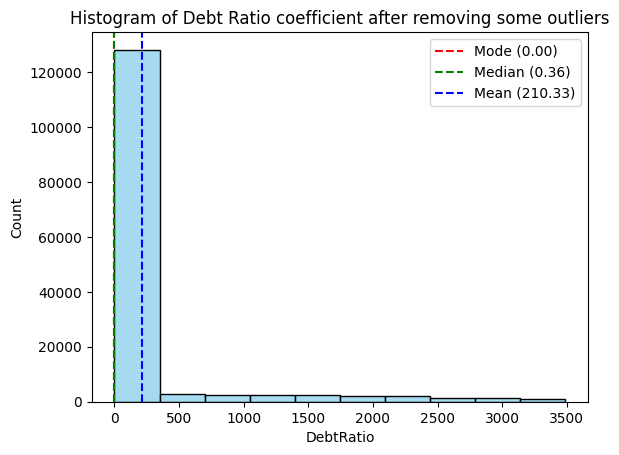

In [ ]:
sns.histplot(removed_debt_outliers["DebtRatio"], bins=10, kde=False, color='skyblue')
mode_value = removed_debt_outliers["DebtRatio"].mode().iloc[0]
median_value = removed_debt_outliers["DebtRatio"].median()
mean_value =removed_debt_outliers["DebtRatio"].mean()
plt.axvline(mode_value, color='r', linestyle='--', label=f'Mode ({mode_value:.2f})')
plt.axvline(median_value, color='g', linestyle='--', label=f'Median ({median_value:.2f})')
plt.axvline(mean_value, color='b', linestyle='--', label=f'Mean ({mean_value:.2f})')
plt.title('Histogram of Debt Ratio coefficient after removing some outliers')
plt.legend()
plt.show()

In [60]:
removed_debt_outliers["DebtRatio"].describe().round(3)

count    146250.000
mean        210.326
std         620.474
min           0.000
25%           0.170
50%           0.356
75%           0.758
max        3489.000
Name: DebtRatio, dtype: float64

In [ ]:
big_debt_ratio = removed_debt_outliers[removed_debt_outliers["DebtRatio"]>1]
big_debt_ratio.shape

(31387, 11)

In [ ]:
removed_debt_outliers[removed_debt_outliers['DebtRatio'] > 500][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,16852.000000,1119.000000
mean,0.050854,0.274352
std,0.219707,0.446387
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [ ]:
removed_debt_outliers["MonthlyIncome"].describe().round(3)

count     120084.000
mean        6680.497
std        14393.366
min            0.000
25%         3400.000
50%         5400.000
75%         8250.000
max      3008750.000
Name: MonthlyIncome, dtype: float64

In [10]:
df = removed_debt_outliers
df.shape

(146250, 14)

In [11]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomeCategory,HasIncome,AgeCategory
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,Lower-Middle Income,1,Mature Adults
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,Low Income,1,Mature Adults
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,Low Income,1,Adults
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,Low Income,1,Adults
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,Exceptionally High Income,1,Senior Adults


# 3. Preparing the Data for the Machine Learning Algorithms

## Encoding categorical variables
### Weight of Evidence (WoE) Encoding:

1. **Purpose and Use Case**:
   - Primarily used in credit scoring and risk modeling.
   - Effective for binary classification problems, especially with a binary target variable.

2. **How It Works**:
   - Transforms a categorical variable into a continuous one by calculating the log of the ratio of the distribution of the target variable.
   - Provides a measure of the "strength" of a grouping in separating good cases from bad cases.

3. **Output**:
   - A single continuous variable for each categorical variable.

4. **Advantages**:
   - Handles categories with different levels of risk naturally.
   - Does not expand the feature space significantly.
   - Captures the relationship between the categorical variable and the binary target.

5. **Disadvantages**:
   - Not suitable for non-binary classification or regression tasks.
   - Can be sensitive to rare events.
   - Requires careful handling of zero-frequency cases.

### One-Hot Encoding:

1. **Purpose and Use Case**:
   - Used in various types of machine learning problems, including regression, classification, etc.
   - Suitable for nominal (non-ordinal) categorical variables.

2. **How It Works**:
   - Creates a new binary (0 or 1) column for each level of the categorical variable.
   - Each observation gets a 1 in the column of its category and 0 in all others.

3. **Output**:
   - Expands the feature space, with one binary feature for each category level.

4. **Advantages**:
   - Simple and effective, widely used and understood.
   - Preserves information about the category.
   - Suitable for non-linear relationships.

5. **Disadvantages**:
   - Can result in a high-dimensional feature space.
   - Not suitable for categorical variables with many levels.

### Choosing Between WoE and One-Hot Encoding:

- **Use WoE** for binary classification, particularly in risk modeling or credit scoring.
- **Use One-Hot Encoding** for general purposes, non-binary classification problems, or regression.

**Thus, we will chose WOE over OneHotEncoding in this project**

In [12]:
categorical_cols = removed_debt_outliers.select_dtypes(include=['object', 'category']).columns.tolist()

# Add 'Missing' as a category for each categorical column
for col in categorical_cols:
    if df[col].dtype.name == 'category':
        df[col] = df[col].cat.add_categories('Missing')
    df[col] = df[col].fillna('Missing')

# Recalculate the number of null values
null_val_sums_2 = df.isnull().sum()

# Creating DataFrame to display the information
pd.DataFrame({"Column": null_val_sums_2.index,
              "Number of Null Values": null_val_sums_2.values,
              "Proportion": null_val_sums_2.values / len(df)})

,Column,Number of Null Values,Proportion
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,26166,0.178913
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


## Data Transformation Pipeline

In [13]:
# Split the data into training and testing sets
X = df.drop(['SeriousDlqin2yrs'], axis=1)
y = df['SeriousDlqin2yrs'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
# The stratify argument in the train_test_split function from scikit-learn is used to ensure that the train 
# and test sets have approximately the same percentage of samples of each target class as the complete set.

# Automatically get the list of categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute with median for numerical columns
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('woe', WOEEncoder(cols=categorical_cols))  # WOE encoding for categorical columns
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a final pipeline that includes the preprocessing steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the training data
X_train_transformed_numpy = pipeline.fit_transform(X_train, y_train)

# Transform the testing data (do not fit again)
X_test_transformed_numpy = pipeline.transform(X_test)

# Create DataFrames from the transformed NumPy arrays
X_train_scaled = pd.DataFrame(X_train_transformed_numpy, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_transformed_numpy, columns=X_test.columns)


### One Hot Encoder was also implemented separately but the results were sligthly lower than with WOE Encoder

In [139]:
# # Split the data into training and testing sets
# X = df.drop(['SeriousDlqin2yrs'], axis=1)
# y = df['SeriousDlqin2yrs'].copy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# # Automatically get the list of categorical and numerical columns
# categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Create transformers for numerical and categorical columns
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),  # Impute with median for numerical columns
#     ('scaler', StandardScaler())                    # Scale numerical columns
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute with the most frequent for categorical columns
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))     # OneHot encoding for categorical columns
# ])

# # Combine transformers using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Create a final pipeline that includes the preprocessing steps
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

# # Fit and transform the training data
# X_train_transformed = pipeline.fit_transform(X_train, y_train)

# # Transform the testing data (do not fit again)
# X_test_transformed = pipeline.transform(X_test)

# # Since OneHotEncoder can create new columns, get the feature names from the preprocessor
# feature_names = numerical_cols + list(
#     pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
# )

# # Create DataFrames from the transformed arrays
# X_train_scaled = pd.DataFrame(X_train_transformed, columns=feature_names)
# X_test_scaled = pd.DataFrame(X_test_transformed, columns=feature_names)


In [14]:
X_train_scaled.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomeCategory,HasIncome,AgeCategory
0,-0.022982,-0.020441,0.134919,-0.339328,-0.070185,1.881662,-0.064435,-0.896754,-0.058443,-0.670098,0.100156,-0.131575,0.011221
1,-0.022183,-0.087707,-0.099761,-0.338852,0.014895,0.904033,-0.064435,0.924461,-0.058443,-0.670098,0.100156,-0.131575,0.011221
2,-0.021785,-0.087707,-0.099761,-0.339324,-0.252424,-1.246751,-0.064435,-0.896754,-0.058443,-0.670098,0.100156,0.290471,0.011221
3,-0.020476,1.055831,-0.099761,-0.337465,-0.387801,3.054818,-0.064435,-0.896754,-0.058443,-0.670098,0.100156,0.290471,-0.551765
4,-0.023282,-1.029445,-0.099761,-0.338935,-0.377387,-1.051226,-0.064435,-0.896754,-0.058443,0.232334,0.100156,0.290471,0.465749


In [15]:
X_test_scaled.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomeCategory,HasIncome,AgeCategory
0,-0.022993,0.114093,-0.099761,-0.338868,1.283590,1.881662,-0.064435,1.835068,-0.058443,-0.670098,0.100156,-0.471745,0.011221
1,-0.020313,-0.087707,-0.099761,-0.339137,-0.054564,-0.855700,-0.064435,-0.896754,-0.058443,2.037197,0.100156,-0.131575,0.011221
2,-0.023282,-0.760377,-0.099761,-0.339312,-0.119650,-0.855700,-0.064435,-0.896754,-0.058443,1.134766,0.100156,-0.131575,0.253572
3,-0.022021,0.114093,-0.099761,-0.338539,-0.405192,-0.855700,-0.064435,0.013854,-0.058443,2.037197,0.100156,0.290471,0.011221
4,-0.023282,-0.087707,-0.099761,2.327755,-0.106633,-0.660174,-0.064435,0.013854,-0.058443,-0.670098,0.100156,-0.213310,0.011221


### Feature Selection

- Feature selection is deemed unnecessary, primarily because the extensive number of observations (146,250) significantly surpasses the relatively modest count of features (14). This substantial difference effectively diminishes the risk of overfitting.

- Furthermore, the correlation between the features is minimal, indicating an absence of redundant features. In the hypothetical scenario where redundancy exists, we could address it by either removing or reducing it through dimensionality reduction techniques.

## Selecting a Cost Function
In machine learning, a cost function, also known as a loss or objective function, quantifies the difference between predicted and actual values. The goal is to minimize this function during the training process. The choice of a suitable cost function depends on the type of problem (e.g., regression, classification) and desired model behavior. Minimizing the cost function leads to the model learning optimal parameters and improving its predictive accuracy. Common examples include mean squared error for regression tasks and cross-entropy for classification problems.

Cross-entropy, often used as a cost function in machine learning, measures the dissimilarity between predicted and actual probability distributions. In classification tasks, it quantifies how well the predicted probabilities align with the true class labels. Minimizing cross-entropy during training improves the accuracy of the model's predictions. It is a fundamental concept in information theory and is widely applied, especially in scenarios involving categorical outcomes.

Given that we're dealing with a supervised classification problem involving two classes, we'll employ binary classification log loss. This metric calculates the cross-entropy between the actual labels and the predictions generated by the model.

$$\mathrm{log loss}= -\frac{1}{N}\sum_{i=1}^N  \left[y_{i} \log(p_i)+(1-y_i)\log(1-p_i)\right]$$

### Model Training Process
The logistic regression model will undergo training across each of the five k-fold cross-validation splits. During each iteration, the model is trained on four-fifths of the training set, and its performance is assessed on the fifth slice reserved for validation.

Throughout the iterative training and evaluation process, the cost function will be computed for both the training subset (i.e., the four-fifths slice of the original training set) and the validation subset (i.e., the one-fifth slice of the original training set).

Additionally, predictions will be stored for each of the five cross-validation sets. By the conclusion of the fifth iteration, a set of predictions for the entire training dataset will have been accumulated.

## Model 1: Logistic Regression
The model:

$$p(x) = \frac{e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 \dots }}{1 + e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 \dots }} = sigmoid(\beta_0 + \beta_1 x_1 + \beta_2 x_2 \dots)$$

- We will opt for the default L2 penalty rather than L1. L2 demonstrates lower sensitivity to outliers, assigning non-zero weights to nearly all features and yielding a more stable solution.

- In contrast, L1 assigns substantial weights to crucial features while assigning close-to-zero weights to others, essentially conducting feature selection during the algorithm's training.

- **The regularization strength, denoted as \(C\), plays a crucial role in addressing overfitting by penalizing complexity. A higher \(C\) implies a stronger penalty, guiding the machine learning algorithm towards simpler models.**

- Given the highly imbalanced nature of the dataset, with only 6.68 % of observations labeled as default, we aim to emphasize learning from these during the algorithm's training.

- To achieve this, we will set the class_weight to *balanced*. This instructs the algorithm to assign greater weight to positive labels (Default) and lower weight to negative labels (Non-default), proportional to their respective frequencies, effectively focusing more on the rare positive cases.

Advantages:

straightforward
easily understandable
facilitates inference

Disadvantages:

relies on assumptions inherent to logistic regression
Hyperparameters:

C: The inverse of the regularization strength for $l_1$ or $l_2$ regularization; smaller values indicate stronger regularization
Penalty: The norm utilized in penalization (e.g., $l_1$, $l_2$, or a combination)

In [17]:
LR_model = LogisticRegression(C=0.01)
LR_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01)

In [18]:
predicted_probabilities = LR_model.predict_proba(X_test_scaled)[:, 1]
predicted_probabilities

array([0.03525547, 0.07027476, 0.08026125, ..., 0.05860197, 0.05832571,
       0.08711775])

In [19]:
y_pred = LR_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Assessing the Outcomes
In most cases (though exceptions exist), the log loss observed during training tends to be lower than that during cross-validation. This discrepancy arises because the machine learning algorithm directly learns from the training data, leading to better performance (i.e., lower log loss) on the training set compared to the cross-validation set.

It's crucial to note that the cross-validation set comprises transactions deliberately withheld from the training process.

Across all five runs, the log losses for both training and cross-validation sets exhibit similarity.

The logistic regression model demonstrates no significant overfitting. In cases of severe overfitting, one would observe a low training log loss accompanied by a relatively high cross-validation log loss.

![image.png](https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816)


**Accuracy**: $(TP + TN)/(TP + TN + FP + FN)$ -- the fraction of predictions our model got right

**Precision**: $TP/ (TP + FP)$ -- What proportion of positive identifications was actually correct?

**Recall**: $TP / (TP + FN)$ -- What proportion of actual positives was identified correctly?


For Credit scoring, in the setting when 1 means Default, Recall metric is arguably more importan. As for a lender correctly predicting default cases seems more important.

In [20]:
score = roc_auc_score(y_test, predicted_probabilities)
print('ROC AUC {:.4f}'.format(score))

ROC AUC 0.7057


In [145]:
scores = predicted_probabilities

In [146]:
a = confusion_matrix(y_test, y_pred)
a

array([[27266,    27],
       [ 1928,    29]])

In [147]:
print('accuracy = {:.3f}'.format((a[0,0] + a[1,1]) / a.sum()))
print('accuracy_score(yval, y_pred) = {:.3f}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.933
accuracy_score(yval, y_pred) = 0.933


In [148]:
# As a rule of thumb, we employ the threshhold level that is approximately equal to the mean level of our target variable. Approximatey, 6.68% in pur case.
# In order to make Recall higher we will set up the threshhold value to relatively low level.
threshold = 0.06684

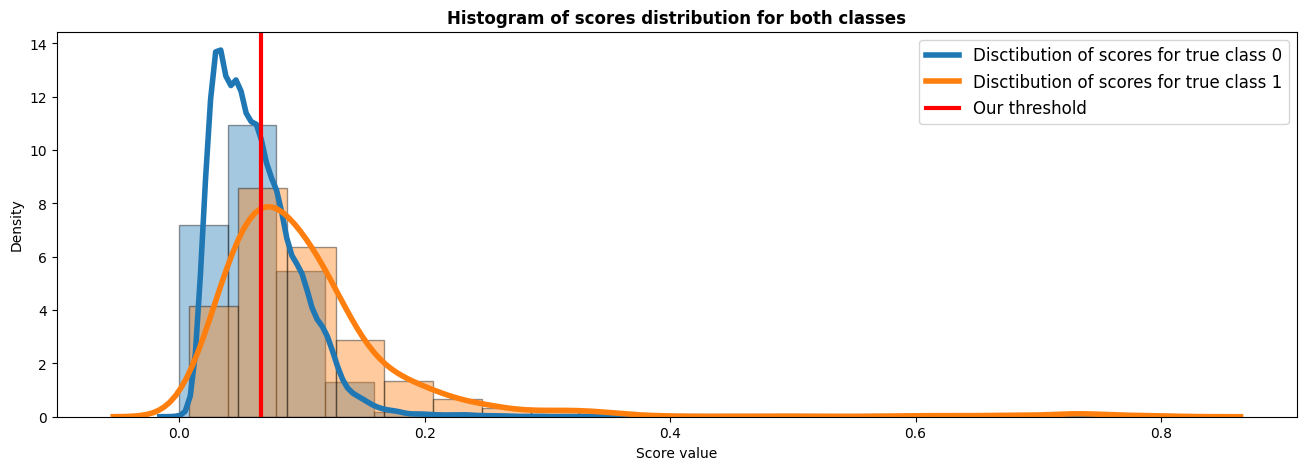

In [149]:
fig = plt.figure(figsize=(16, 5))

sns.distplot(scores[y_test == 0], hist=True, kde=True,
             bins=20,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(scores[y_test == 1], hist=True, kde=True,
             bins=20,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.axvline(threshold, color='red', linewidth=3)

plt.title("Histogram of scores distribution for both classes", weight="bold")

plt.xlabel("Score value")

plt.legend(['Disctibution of scores for true class 0',
           'Disctibution of scores for true class 1', 'Our threshold'], fontsize=12)

plt.show();

In [150]:
tr = np.linspace(0, 1, 100)
p = np.zeros_like(tr)
r = np.zeros_like(tr)
f = np.zeros_like(tr)
for k, x in enumerate(tr):
    y_pred = scores >= x
    p[k] = precision_score(y_test, y_pred)
    r[k] = recall_score(y_test, y_pred)
    f[k] = f1_score(y_test, y_pred)

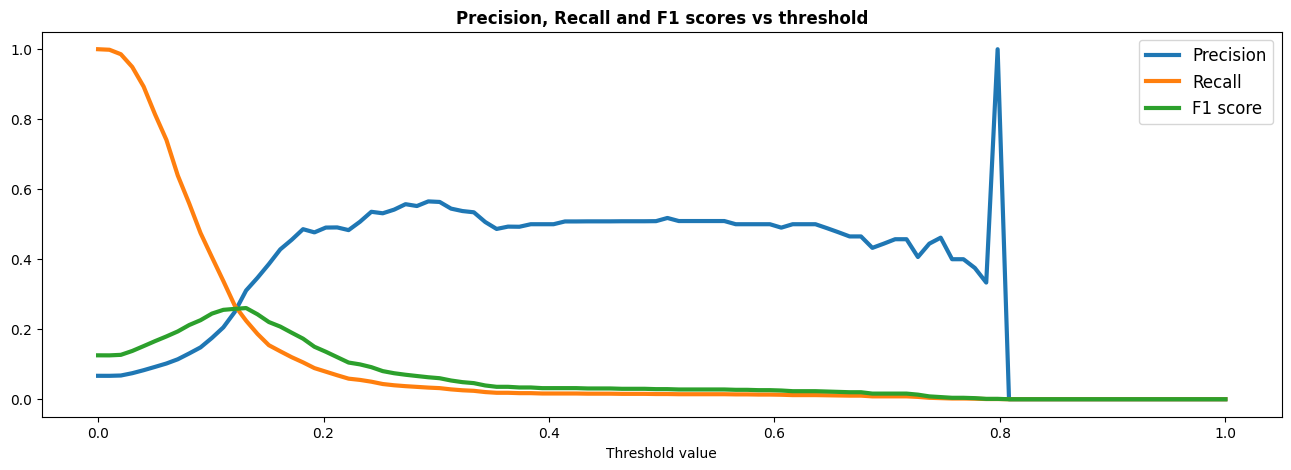

In [151]:
fig = plt.figure(figsize=(16, 5))
plt.plot(tr, p, linewidth=3)
plt.plot(tr, r, linewidth=3)
plt.plot(tr, f, linewidth=3)
plt.title("Precision, Recall and F1 scores vs threshold", weight="bold")
plt.xlabel("Threshold value")
plt.legend(['Precision', 'Recall', 'F1 score'], fontsize=12)
plt.show()

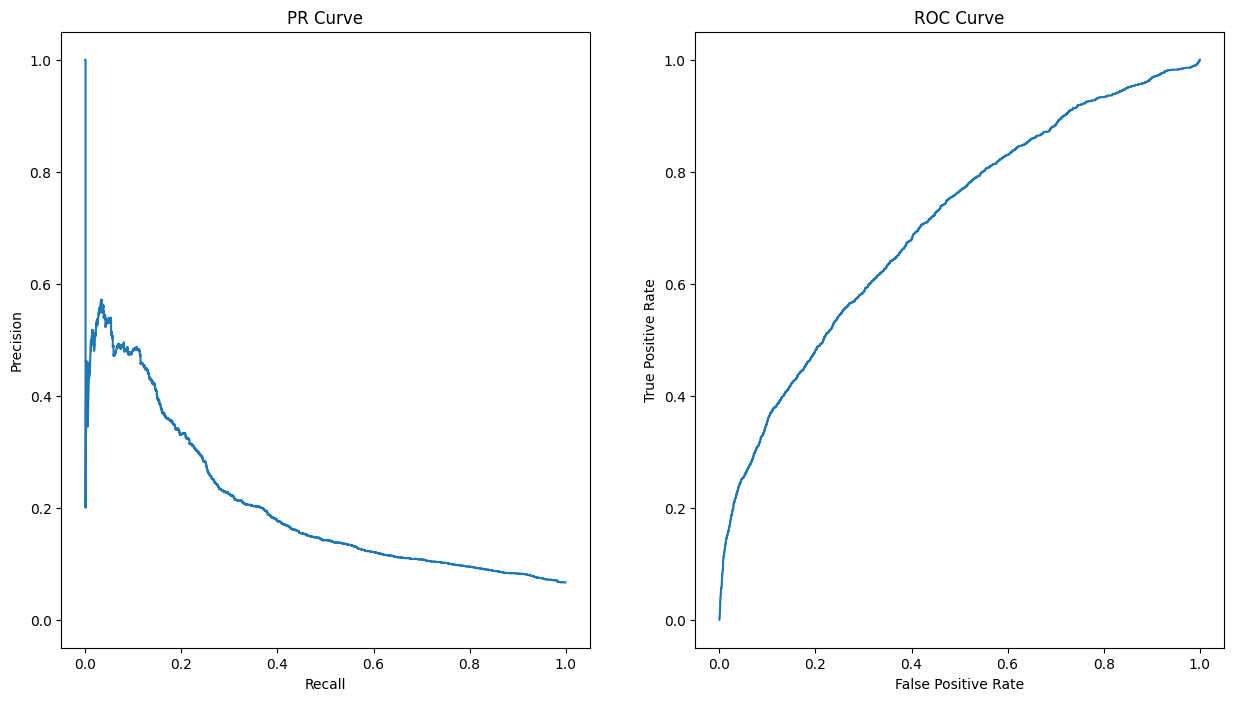

In [152]:
p, r, _ = precision_recall_curve(y_test, scores)
tpr, fpr, _ = roc_curve(y_test, scores)

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

ax1.plot(r,p)
ax2.plot(tpr,fpr)

plt.show()

### Cross-Validation

### Generating k-Fold Cross-Validation Sets
K-fold cross-validation is a technique in machine learning where the dataset is divided into k subsets. The model is trained and validated k times, each time using a different fold for validation and the remaining folds for training. It provides a more robust estimate of the model's performance, helps identify potential issues like overfitting, and is commonly used for parameter tuning. The final performance metric is often the average across all k runs. This approach is beneficial for making the most effective use of available data and reducing the variance in performance estimation.


In [21]:
cv = StratifiedKFold(n_splits=5)
LR_model = LogisticRegression(C=0.01)
scores = cross_val_score(LR_model, X_train_scaled, y_train, scoring='roc_auc')
print('Scores on CV folds:', scores, '\n')
print('Average score on CV folds: {:.4f}'.format(np.mean(scores)))
print('Std of score on CV folds: {:.4f}'.format(np.std(scores)))

Scores on CV folds: [0.69324672 0.70337377 0.69299763 0.70877457 0.70878137] 

Average score on CV folds: 0.7014
Std of score on CV folds: 0.0071


# 4. Hyperparameter Tuning

Finding the best hyperparameter for C in logreg using **Grid Search** using roc-auc scoring

In [22]:
params = {
    'C': np.logspace(-3, 0, 20),
}

LR_model = LogisticRegression()

GS_LR = GridSearchCV(cv=cv, estimator=LR_model, param_grid=params, scoring='roc_auc')

GS_LR.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ])},
             scoring='roc_auc')

In [23]:
print('Best C {:.3f}'.format(GS_LR.best_params_['C']))
print('Best ROC AUC {:.4f}'.format(GS_LR.best_score_))

Best C 0.038
Best ROC AUC 0.7039


### Plotting mean and std of scores after CV

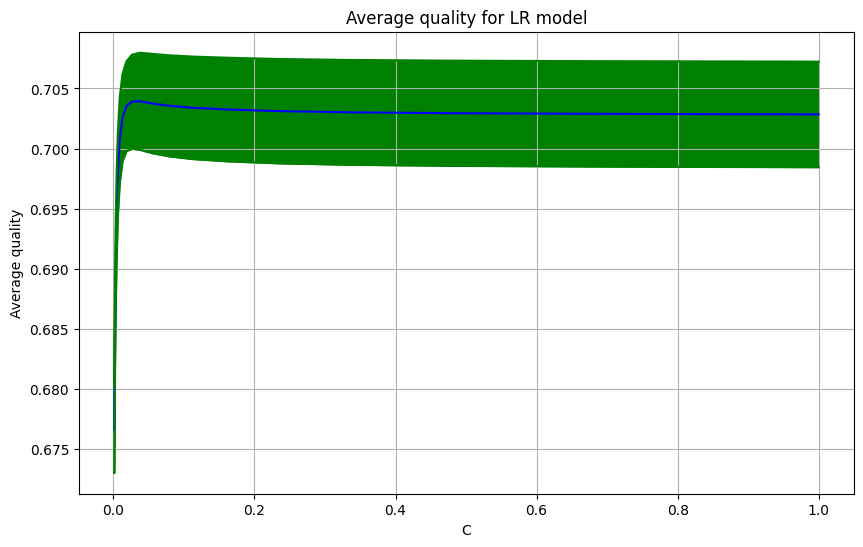

In [157]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 0.5 * stds

plt.figure(figsize=(10, 6))
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LR model')
plt.grid()
plt.show()

.best_estimator_: This attribute of the GridSearchCV or RandomizedSearchCV object contains the best-performing model (estimator) that was found during the search. It represents the model configuration with the best combination of hyperparameters based on the specified scoring metric.

In [158]:
best_model = GS_LR.best_estimator_

In [159]:
best_model.predict(X_test_scaled)

array([0, 0, 0, ..., 0, 0, 0])

## Model 2: Decision Tree Classifier.

A decision tree resembles a flowchart with a tree-like structure, where every internal node represents a test or condition on a particular attribute. The branches emerging from these nodes indicate the possible outcomes of the test (like True or False), and each leaf node, or terminal node, is assigned a class label. This structure is used to make splits in the dataset to distinguish between different classes. When a new data point is introduced, the decision tree classifies it into one of these classes based on the paths and conditions defined in the tree. The boundaries for classification in this model are represented by horizontal and vertical lines.

**Pros:**
1. **Interpretability**: Decision trees are straightforward and easy to understand, making them highly interpretable.
2. **No Need for Feature Scaling**: They don't require feature scaling like normalization or standardization. (you can pass scaled data to a Decision Tree Classifier, but in most cases, it's not necessary, and it won't impact the performance of the model)
3. **Flexibility**: Capable of handling both linear and non-linear problems effectively.

**Cons:**
1. **Performance with Small Datasets**: Tend to underperform on very small datasets.
2. **Overfitting Risks**: Prone to overfitting, especially with complex trees.

### Key Hyperparameters
1. **Criterion**: Choice between 'gini' or 'entropy' for measuring the quality of a split.
2. **Max Depth (`max_depth`)**: The maximum depth of the tree.
3. **Min Samples Split (`min_samples_split`)**: The minimum number of samples required to split an internal node.
4. **Min Samples Leaf (`min_samples_leaf`)**: The minimum number of samples required to be at a leaf node.


In [160]:
dtc = DecisionTreeClassifier(random_state=123)

dtc.fit(X=X_train_scaled, y=y_train)

DecisionTreeClassifier(random_state=123)

In [161]:
score = dtc.score(X_test_scaled, y_test)
print('ROC AUC {:.3f}'.format(score))

ROC AUC 0.899


A decision tree can achieve zero error on a given training sample if it's built consistently. This is because in the feature space, each data point can be encapsulated within an n-dimensional cube that doesn't encompass any other points. A tree can be meticulously structured to fit each of these cubes perfectly. **But, this scenario leads to overfitting.**

## Criteria for Early Stopping in Decision Trees to Prevent Overfitting

1. **Maximum Tree Depth (`max_depth`)**: Restricts the tree to a certain depth to reduce complexity.

2. **Minimum Samples Split (`min_samples_split`)**: Defines the minimum number of samples required to split an internal node. Helps in preventing overly complex trees.

3. **Minimum Samples Leaf (`min_samples_leaf`)**: Sets the minimum number of samples required at a leaf node, avoiding leaves with very few samples.

4. **Maximum Number of Leaf Nodes (`max_leaf_nodes`)**: Controls the size of the tree by limiting the number of leaf nodes.

5. **Maximum Features (`max_features`)**: Limits the number of features considered for each split, reducing the risk of fitting to noise.

6. **Pruning**: Involves removing less powerful branches post full tree development, such as using cost-complexity pruning (`ccp_alpha`).

7. **Cross-Validation**: Utilizes validation data to evaluate the tree's performance on unseen data, aiding in detecting overfitting.

8. **Early Stopping Criteria**: Implementation of a stopping rule based on the improvement threshold of the model's performance.

**These techniques, when combined and tuned through cross-validation, aid in effectively mitigating overfitting in decision trees.**


Cross Validation

In [162]:
cv_scores = cross_val_score(dtc, X_train_scaled, y_train, cv=5, scoring='roc_auc')
# Print the ROC AUC scores for each fold and their mean
print("ROC AUC scores for each fold:", cv_scores)
print("Average ROC AUC score:", cv_scores.mean())

ROC AUC scores for each fold: [0.60930935 0.60657127 0.60760225 0.62531349 0.62146906]
Average ROC AUC score: 0.6140530851892965


### Analysis of ROC AUC Scores

The difference in ROC AUC scores observed between using cross-validation and a single train-test split can be attributed to several factors:

1. **Overfitting in Single Split**: The higher ROC AUC score obtained without cross-validation might indicate overfitting to the specific characteristics of the train-test split. This suggests that the model may have learned details specific to the test data that do not generalize well.

2. **Robustness of Cross-Validation**: Cross-validation offers a more robust estimate of model performance. By training and testing the model on different data subsets, cross-validation provides a more reliable assessment of the model's ability to generalize. This is particularly true for smaller or imbalanced datasets. The average ROC AUC score across folds is generally a more realistic measure of model performance on unseen data.

3. **Dataset Variability**: The varying characteristics of different folds in cross-validation can lead to differences in model performance. This effect is more pronounced in datasets that are small, imbalanced, or noisy.

4. **Data Distribution Differences**: If the distribution of the training set significantly differs from the test set, the model might perform unusually well or poorly on the test set. Cross-validation helps mitigate this by validating the model on multiple data subsets.

5. **Randomness and Model Complexity**: Random Forest models are influenced by the randomness in tree construction. More complex models are more likely to capture noise, leading to optimistically high scores on specific test sets.

**In summary, while single-split ROC AUC scores can be impressive, they might not accurately reflect the model's ability to generalize. The more conservative estimates from cross-validation are usually more reliable and indicative of the model's performance on unseen data.**


### HP tuning

The grid search will explore different combinations of the parameters to find the one that yields the best ROC AUC score.
This approach hepls us to determine not only the depth and complexity of the tree but also to find out how many features should be considered at each split for optimal performance.

In [163]:
# Defining the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2', 0.5, 0.7]
}

# Setting up the Grid Search
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='roc_auc', n_jobs=1)

# Fitting the Grid Search model
grid_search.fit(X_train_scaled, y_train)

# Printing the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best ROC AUC score: 0.8462734445859195


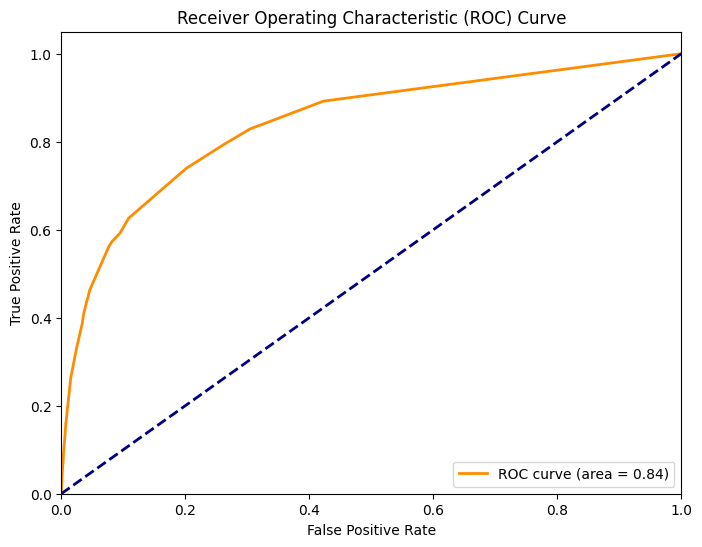

In [164]:
# Get the best estimator
best_model = grid_search.best_estimator_

# Predict probabilities on the test set
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Model 3: Random Forset

### Random Forest Classifier

**Pros:**
- **Better Performance**: Generally provides more accurate predictions than a single decision tree.
- **Overfitting Reduction**: Less prone to overfitting compared to a single decision tree due to averaging of multiple trees.
- **Handles Unbalanced Data**: Works well with unbalanced and missing data.
- **Feature Importance**: Provides insights into feature importance, helpful for feature selection.

**Cons:**
- **Complexity and Size**: More complex and requires more computational resources and memory.
- **Model Interpretability**: Less interpretable than a single decision tree due to the complexity of multiple trees.
- **Training Time**: Longer training time because of multiple trees.
- **Performance with Noisy Data**: Can overfit on certain noisy classification/regression tasks.

Random Forest classifiers generally outperform single Decision Tree classifiers in terms of accuracy and are less prone to overfitting, but they lose out in terms of simplicity and interpretability. The choice between the two depends on the specific requirements of the problem, such as the need for accuracy versus the need for a clear, interpretable model.


Random Forest is based on creating $B$ bootstrap samples (sampling with replacement) from our training data.
For each sample, construct a deep decision tree, resulting in $B$ trees, denoted as $f_1, f_2, \dots, f_B$.
When evaluating splits, randomly select $m$ features from the total $p$ features, where $m < p$.

We shpuld choose the optimal split from these $m$ features. This strategy reduces the correlation between trees.
For predictions, we should calculate the average of all tree predictions: $\hat{y} = 1/B \sum_{i=0}^{B} f_i(x)$.

Key parameters to adjust in this model include:

- n_estimators - the count of trees,
- max_samples - the size of each bootstrapped training set,
- max_features - the number of features to consider for splits,
- max_depth - the maximum depth of each tree.

It's often recommended to leave max_depth unlimited for comprehensive learning, but setting a limit can speed up processing on large datasets or reduce noise impact.
The standard practice is to set n_estimators first, then adjust the other parameters. The second most crucial parameter is max_features, which should be tuned with a fixed n_estimators.

In [165]:
# Creating the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Training the model
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [166]:
print(accuracy)
print(conf_matrix)
print(class_report)

0.9357606837606838
[[27021   272]
 [ 1607   350]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27293
           1       0.56      0.18      0.27      1957

    accuracy                           0.94     29250
   macro avg       0.75      0.58      0.62     29250
weighted avg       0.92      0.94      0.92     29250



In [167]:
score = rf_model.score(X_test_scaled, y_test)
print('ROC AUC {:.3f}'.format(score))

ROC AUC 0.936


In [168]:
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
# Print the ROC AUC scores for each fold and their mean
print("ROC AUC scores for each fold:", cv_scores)
print("Average ROC AUC score:", cv_scores.mean())

ROC AUC scores for each fold: [0.83614735 0.83372012 0.84134464 0.84849855 0.84373393]
Average ROC AUC score: 0.8406889179254972


### HP Tuning

Let's switch to Randomized Search procedure in order to increase the speed of computations.
### Randomized Search

- **Sampling**: Randomized Search randomly selects a fixed number of combinations of hyperparameters to evaluate. This number is specified by the user and is independent of the size of the parameter grid.
- **Faster for Large Grids**: It can provide substantial time savings over Grid Search when the number of possible hyperparameter combinations is very high.
- **Probability-Based**: There's a chance that Randomized Search might miss the absolute best combination, especially if the number of iterations is too low. However, in practice, it often finds a combination that is close to the best or good enough, particularly in cases where the hyperparameter response surface is smooth.
- **Efficiency**: For many practical purposes, Randomized Search finds a sufficiently optimal solution much faster than Grid Search because it doesn't need to explore every single combination.

### Speed Comparison

- **Theoretical Speedup**: If we have a grid with 1000 potential combinations and we choose to run Randomized Search with 100 iterations, Randomized Search could theoretically be about 10 times faster. However, this doesn't always linearly translate to real-world speedup due to various factors like model complexity and parallel processing capabilities.
- **Practical Considerations**: In many cases, especially with complex models and large datasets, the time savings can be substantial enough to make Randomized Search the preferred choice, particularly when a slightly suboptimal solution is acceptable.



In [169]:
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 5),
    'max_features': [None, 'auto', 'sqrt', 'log2', 0.5, 0.7]
}

# Set up the Randomized Search
n_iter_search = 20  # Number of parameter settings that are sampled
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the Randomized Search model
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best ROC AUC score
print("Best parameters:", random_search.best_params_)
print("Best ROC AUC score:", random_search.best_score_)


Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best ROC AUC score: 0.865517944864699


## Model 4: k Nearest Neighbours (kNN)

### k-Nearest Neighbors (kNN) Summary

k-Nearest Neighbors (kNN) is a fundamental algorithm in machine learning, used for both classification and regression tasks. Below is an overview of its key aspects:

#### Concept
- **Proximity-Based**: Assumes similar data points are close to each other.
- **Instance-Based Learning**: Retains the training dataset for making predictions.

#### Working
- **Classification**: Assigns a class based on the majority class of the 'k' nearest neighbors.
- **Regression**: Predicts a value based on the average of the values of the 'k' nearest neighbors.
- **Distance Metric**: Utilizes metrics like Euclidean or Manhattan distance to find closest neighbors.

#### Hyperparameters
- **Number of Neighbors (k)**: Crucial parameter influencing the model's sensitivity to noise and computation cost.
- **Distance Metric**: Choice of metric (Euclidean, Manhattan, Minkowski, etc.) can impact performance.

#### Features
- **No Training Phase**: Does not learn a function but stores the dataset.
- **Lazy Learning**: Approximates the function locally, with computation deferred until evaluation.

#### Advantages
- **Simple and Versatile**: Easy to implement, suitable for classification and regression.
- **Effective with Sufficient Data**: Performs well with large, representative datasets.

#### Disadvantages
- **Scalability and Efficiency**: Inefficient with large datasets due to storage and computation needs.
- **Curse of Dimensionality**: Performance degrades with increasing number of features.
- **Sensitivity to Features**: Requires careful feature selection or dimensionality reduction.

#### Applications
- Used in recommender systems, image classification, pattern recognition, and more. Its effectiveness depends on data quality, 'k' value, and distance metric choice.


In [24]:
kNN_model = KNeighborsClassifier()
cv_scores = cross_val_score(kNN_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
# Print the ROC AUC scores for each fold and their mean
print("ROC AUC scores for each fold:", cv_scores)
print("Average ROC AUC score:", cv_scores.mean())

ROC AUC scores for each fold: [0.67946359 0.6610162  0.6702669  0.68026733 0.67307875]
Average ROC AUC score: 0.6728185537638607


In [25]:
cv = StratifiedKFold(n_splits=5)

kNN_model = KNeighborsClassifier()

# Define the hyperparameter distribution
params = {
    'n_neighbors': sp_randint(1, 100)
}

# Set up Randomized Search
n_iter_search = 20
RS_kNN = RandomizedSearchCV(
    kNN_model,
    param_distributions=params,
    n_iter=n_iter_search,
    cv=cv,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1  # Uses all available cores
)

# Fit the Randomized Search model
RS_kNN.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", RS_kNN.best_params_)
print("Best ROC AUC Score:", RS_kNN.best_score_)

Best Parameters: {'n_neighbors': 93}
Best ROC AUC Score: 0.7626035716254123


## Model 5: Blending. Voting Classifier

A Voting Classifier is an ensemble machine learning model that combines the predictions from multiple other models. It is typically used to improve the overall performance by leveraging the strengths of various base models.

#### Concept
- **Ensemble Approach**: Combines the decisions from multiple models to make a final prediction.
- **Types of Voting**:
  - **Hard Voting**: Uses the mode of the predictions (majority vote) from the base models.
  - **Soft Voting**: Predicts the class label based on the average of probabilities given by the base models.

#### Working
- **Combining Models**: Incorporates diverse models, often with different algorithms, to make a collective decision.
- **Final Decision Rule**: Depends on the voting strategy (hard or soft).

#### Advantages
- **Improved Performance**: Often achieves higher performance than individual models alone.
- **Reduced Overfitting**: By averaging out biases, it reduces the likelihood of overfitting.

#### Disadvantages
- **Complexity**: More complex to implement and understand compared to a single model.
- **Computationally Intensive**: Requires training multiple models, which can be resource-intensive.

#### Applications
- Commonly used in competitions and practical applications where performance improvement is critical.
- Effective in scenarios where individual models have different strengths and weaknesses.

#### Considerations
- **Model Diversity**: It is crucial to combine models that are diverse and have different error patterns.
- **Tuning**: Requires careful tuning of the base models and the selection of an appropriate voting strategy.


In [26]:
# pass our models to VotingClassifier

kNN_model = KNeighborsClassifier(n_neighbors=RS_kNN.best_params_['n_neighbors'])

LR_model = LogisticRegression(C=GS_LR.best_params_['C'])

VC = VotingClassifier([('kNN', kNN_model), ('LR', LR_model)], voting='soft')

In [28]:
cv_scores = cross_val_score(VC, X_train_scaled, y_train, cv=5, scoring='roc_auc')
# Print the ROC AUC scores for each fold and their mean
print("ROC AUC scores for each fold:", cv_scores)
print("Average ROC AUC score:", cv_scores.mean())

ROC AUC scores for each fold: [0.76202328 0.7624324  0.76576745 0.77400369 0.77806279]
Average ROC AUC score: 0.7684579215881895


In [174]:
# Define the distribution for weights
def generate_random_weights():
    i = np.random.uniform(0, 1)
    return [i, 1 - i]

# Set up Randomized Search
n_iter_search = 20
RS_VC = RandomizedSearchCV(
    estimator=VC,
    param_distributions={
        'weights': [generate_random_weights() for _ in range(200)]
    },
    n_iter=n_iter_search,
    cv=cv,
    scoring='roc_auc',
    random_state=123,
    n_jobs=-1
)

# Fit the Randomized Search model
RS_VC.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", RS_VC.best_params_)
print("Best ROC AUC Score:", RS_VC.best_score_)

Best Parameters: {'weights': [0.7337846349791132, 0.26621536502088683]}
Best ROC AUC Score: 0.7719501415505146


## Model 6: LightGBM  (Light Gradient Boosting Machine)

### LightGBM and XGBoost: Overview of Gradient Boosting Frameworks

#### LightGBM (Light Gradient Boosting Machine)
- **Developed By**: Microsoft.

**Key Features**:
- **Efficient Handling of Large Data**: Utilizes a histogram-based algorithm, enhancing speed and efficiency, especially with large datasets.
- **Lower Memory Usage**: More memory-efficient compared to traditional gradient boosting frameworks.
- **Gradient-based One-Side Sampling (GOSS)**: A feature sampling method focusing on the most informative instances and minimizing the influence of less significant ones.
- **Exclusive Feature Bundling (EFB)**: Reduces the number of features by bundling mutually exclusive features, with minimal information loss.
- **Support for Categorical Features**: Natively handles categorical features, eliminating the need for one-hot encoding.

**Usage**:
- Ideal for handling large datasets efficiently and speedily, often chosen in scenarios with limited computational resources.

#### XGBoost (eXtreme Gradient Boosting)
- **Developed By**: Tianqi Chen, as part of the Distributed Machine Learning Toolkit (DMLC) project.

**Key Features**:
- **High Performance and Scalability**: Renowned for its robust performance and scalability.
- **Regularization**: Incorporates L1 and L2 regularization to help reduce overfitting.
- **Handling of Missing Values**: Effectively manages missing data natively.
- **Tree Pruning**: Employs a depth-first approach for tree pruning, diverging from traditional methods.
- **Cross-validation**: Features an inbuilt cross-validation mechanism.

**Usage**:
- Extremely versatile, suitable for a broad spectrum of data science challenges and competitions, known for its high-performance model output.


### Differences from Random Forest

- **Model Building**:
  - Random Forest builds trees independently.
  - LightGBM and XGBoost build trees sequentially.

- **Bias-Variance Trade-off**:
  - Random Forest reduces variance without increasing bias.
  - Gradient boosting methods (LightGBM, XGBoost) can reduce bias but may increase variance.

- **Performance**:
  - LightGBM and XGBoost often outperform Random Forest in terms of prediction accuracy, particularly in structured data scenarios and Kaggle competitions.

- **Speed and Scalability**:
  - LightGBM is designed for speed and efficiently handles larger datasets compared to Random Forest and XGBoost.

- **Interpretability**:
  - Random Forest is generally more interpretable than boosting methods, owing to the simplicity of averaging multiple decision trees.


In [30]:
lgbm_model = lgb.LGBMClassifier(random_state=123)
lgbm_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 7828, number of negative: 109172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 117000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066906 -> initscore=-2.635218
[LightGBM] [Info] Start training from score -2.635218


LGBMClassifier(random_state=123)

In [31]:
y_pred = lgbm_model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9372991452991453
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27293
           1       0.60      0.18      0.28      1957

    accuracy                           0.94     29250
   macro avg       0.77      0.59      0.63     29250
weighted avg       0.92      0.94      0.92     29250



In [32]:
y_pred_proba = lgbm_model.predict_proba(X_test_scaled)[:, 1]
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8654613373399933


In [33]:
cv_scores = cross_val_score(lgbm_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
# Print the ROC AUC scores for each fold and their mean
print("ROC AUC scores for each fold:", cv_scores)
print("Average ROC AUC score:", cv_scores.mean())

[LightGBM] [Info] Number of positive: 6262, number of negative: 87338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 93600, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066902 -> initscore=-2.635286
[LightGBM] [Info] Start training from score -2.635286
[LightGBM] [Info] Number of positive: 6262, number of negative: 87338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 93600, number of used features: 13
[LightGBM] [Info] [bin

In [34]:
# Define the LightGBM model
lgbm = lgb.LGBMClassifier(random_state=123)

# Define the hyperparameter space to search
param_dist = {
    'num_leaves': sp_randint(20, 50),
    'min_child_samples': sp_randint(100, 500),
    'min_child_weight': sp_uniform(0.01, 0.1),
    'subsample': sp_uniform(0.6, 0.4),
    'colsample_bytree': sp_uniform(0.6, 0.4),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

# Set up Randomized Search
n_iter_search = 20
RS_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring='roc_auc',
                                   cv=5, random_state=123, n_jobs=-1)

# Fit Randomized Search
RS_lgbm.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best Parameters:", RS_lgbm.best_params_)
print("Best ROC AUC Score:", RS_lgbm.best_score_)

[LightGBM] [Info] Number of positive: 7828, number of negative: 109172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 117000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066906 -> initscore=-2.635218
[LightGBM] [Info] Start training from score -2.635218
Best Parameters: {'colsample_bytree': 0.6695626064946804, 'min_child_samples': 378, 'min_child_weight': 0.052583029029582805, 'num_leaves': 24, 'reg_alpha': 5, 'reg_lambda': 50, 'subsample': 0.7857072222946672}
Best ROC AUC Score: 0.867460924588592


In [45]:
# Evaluate on test set
y_pred = RS_lgbm.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print("Test ROC AUC Score:", roc_auc)

Test ROC AUC Score: 0.8664197758119879


## Model 7: XGBoost (eXtreme Gradient Boosting)

In [35]:
# Create an XGBoost classifier model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=123)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print(classification_report(y_test, y_pred))

Accuracy: 0.9353504273504274
ROC AUC Score: 0.5899119476018313
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27293
           1       0.55      0.19      0.28      1957

    accuracy                           0.94     29250
   macro avg       0.75      0.59      0.62     29250
weighted avg       0.92      0.94      0.92     29250



In [36]:
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
# Print the ROC AUC scores for each fold and their mean
print("ROC AUC scores for each fold:", cv_scores)
print("Average ROC AUC score:", cv_scores.mean())

ROC AUC scores for each fold: [0.85353713 0.85247407 0.85736379 0.86803995 0.85598664]
Average ROC AUC score: 0.8574803179073726


In [39]:
from scipy.stats import randint as sp_randint, uniform as sp_uniform

# Corrected parameter distributions
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'learning_rate': sp_uniform(0.01, 0.59),  # Adjusted upper limit to ensure it's less than 0.6
    'subsample': sp_uniform(0.3, 0.7),
    'max_depth': sp_randint(3, 10),
    'colsample_bytree': sp_uniform(0.1, 0.9),  # Corrected to ensure it's between 0 and 1
    'min_child_weight': sp_randint(1, 6)
}

# Number of iterations for Randomized Search
n_iter_search = 20

# Set up Randomized Search
RS_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    error_score='raise',
    n_jobs=-1
)

# Fit Randomized Search using the scaled training data
RS_xgb.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best Parameters:", RS_xgb.best_params_)
print("Best ROC AUC Score:", RS_xgb.best_score_)


Best Parameters: {'colsample_bytree': 0.4961372443656412, 'learning_rate': 0.0820025585584195, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 305, 'subsample': 0.5737424253012685}
Best ROC AUC Score: 0.8597563115183547


# Preliminary summary of the results so far

Based on the extracted performance metrics from the notebook, here are the ROC AUC scores for the different models:

1. **Logistic Regression (Cross-Validation)**: Average ROC AUC = 0.7014 **Logistic Regression (GridSearchCV)**: Best ROC AUC = 0.7039
2. **Decision Tree Classifier (Cross-Validation)**: Average ROC AUC = 0.6141 **Decision Tree Classifier (GridSearchCV)**: Best ROC AUC = 0.8463
3. **Random Forest Classifier (Cross-Validation)**: Average ROC AUC = 0.8407 **Random Forest Classifier (RandomizedSearchCV)**: Best ROC AUC = 0.8655
4. **K-Nearest Neighbors (Cross-Validation)**: Average ROC AUC = 0.6728  **K-Nearest Neighbors (RandomizedSearchCV)**: Best ROC AUC = 0.7626
5. **Voting Classifier (Cross-Validation)**: 0.7685 **Voting Classifier (RandomizedSearchCV)**: Best ROC AUC = 0.772
6. **LightGBM (Cross-Validation)** Average ROC AUC = 0.865  **LightGBM (RandomizedSearchCV)** Best ROC AUC Score = 0.8675
7. **XGBoost (Cross-Validation)** Average ROC AUC = 0.8575 **XGBoost (RandomizedSearchCV)** Best ROC AUC Score = 0.8598

From these results, the **Light Gradient Boosting Machine with RandomizedSearchCV used to tune hyperparameters** appears to be the best model with the highest ROC AUC score of **0.8675**. This model outperforms the others in terms of the ROC AUC metric, which is a key indicator of performance in binary classification tasks.

It's important to note that while ROC AUC is a crucial metric, other factors like model interpretability, computational efficiency, and how the model will be used in practice should also be considered when finalizing the best model for deployment.



For completeness, let's provide GINI coeefficients as well:
### Gini=2×ROC AUC−1

1. **Logistic Regression (Cross-Validation)**: Average Gini = 0.4028 **Logistic Regression (GridSearchCV)**: Best Gini = 0.4078
2. **Decision Tree Classifier (Cross-Validation)**: Average Gini = 0.2282 **Decision Tree Classifier (GridSearchCV)**: Best Gini = 0.6926
3. **Random Forest Classifier (Cross-Validation)**: Average Gini = 0.6814 **Random Forest Classifier (RandomizedSearchCV)**: Best Gini = 0.731
4. **K-Nearest Neighbors (Cross-Validation)**: Average Gini = 0.3456 **K-Nearest Neighbors (RandomizedSearchCV)**: Best Gini = 0.5252
5. **Voting Classifier (Cross-Validation)**: Average Gini = 0.537 **Voting Classifier (RandomizedSearchCV)**: Best Gini = 0.544
6. **LightGBM (Cross-Validation)**: Average Gini = 0.73 **LightGBM (RandomizedSearchCV)**: Best Gini = 0.735
7. **XGBoost (Cross-Validation)**: Average Gini = 0.715 **XGBoost (RandomizedSearchCV)**: Best Gini = 0.7196
= 2 * 0.8598 - 1 = 0.7196


## STACKING

In [42]:
from sklearn.ensemble import StackingClassifier

# Base models
base_models = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('xgb', xgb.XGBClassifier(eval_metric='logloss')),
    ('lgb', lgb.LGBMClassifier())
]

# Meta-learner
meta_learner = LogisticRegression()
# Often, a simpler model is chosen as a meta-learner, especially if the base models are complex. 
# The rationale is to avoid overfitting. Logistic Regression and Linear Regression are common choices for binary classification and regression tasks, respectively.

# Creating the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Training the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Evaluating the model
y_pred = stacking_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

[LightGBM] [Info] Number of positive: 7828, number of negative: 109172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 117000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066906 -> initscore=-2.635218
[LightGBM] [Info] Start training from score -2.635218
[LightGBM] [Info] Number of positive: 6262, number of negative: 87338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 93600, number of used features: 13
[LightGBM] [Info] [b

In [43]:
# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(stacking_model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
print("5-fold CV ROC AUC Scores:", cv_scores)
print("Mean CV ROC AUC Score:", cv_scores.mean())

[LightGBM] [Info] Number of positive: 6262, number of negative: 87338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 93600, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066902 -> initscore=-2.635286
[LightGBM] [Info] Start training from score -2.635286
[LightGBM] [Info] Number of positive: 5009, number of negative: 69871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 74880, number of used features: 13
[LightGBM] [Info] [bin

In [46]:
from scipy.stats import randint, uniform

# Reduced hyperparameter grid
param_distributions = {
    'rf__max_depth': randint(3, 10),
    'rf__min_samples_split': randint(2, 6),
    'lr__C': uniform(0.1, 10),
    'knn__n_neighbors': randint(3, 10),
    'dt__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.2),
    'lgb__learning_rate': uniform(0.01, 0.2),
    'final_estimator__C': uniform(0.1, 10)
}

# Randomized Search with cross-validation
RS = RandomizedSearchCV(
    estimator=stacking_model, 
    param_distributions=param_distributions, 
    n_iter=20,  # Reduced number of iterations
    cv=3,  # Reduced number of CV folds
    scoring='roc_auc', 
    random_state=123, 
    n_jobs=-1  # Using all processors
)

RS.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", RS.best_params_)
print("Best ROC AUC Score:", RS.best_score_)


[LightGBM] [Info] Number of positive: 7828, number of negative: 109172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 117000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066906 -> initscore=-2.635218
[LightGBM] [Info] Start training from score -2.635218
[LightGBM] [Info] Number of positive: 6262, number of negative: 87338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 93600, number of used features: 13
[LightGBM] [Info] [b

Best Parameters: {'dt__max_depth': 4, 'final_estimator__C': 0.26129206695016827, 'knn__n_neighbors': 3, 'lgb__learning_rate': 0.07197670185086903, 'lr__C': 5.172043177407953, 'rf__max_depth': 9, 'rf__min_samples_split': 5, 'xgb__learning_rate': 0.16276733889509667}

Best ROC AUC Score: 0.8659.
Which is lower than our single LightGBM algorithm: 0.8675.

Generally, ensembling techniques tend to improve the quality metrics.
This particular result might be due to restricted set of parameters considered because of limited amount of computational resources available on our local machines (we haven't bought Colab's premium account yet). 

In [47]:
# Evaluate on test set
y_pred = RS.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print("Test ROC AUC Score:", roc_auc)

Test ROC AUC Score: 0.8645023465618031


Comparing the test set's results of Stacking and LightGBM is also consistent with our previous explanations. 

Stacking: Test ROC AUC Score: 0.8645

Light GBM: Test ROC AUC Score: 0.8664

### Let's try to increase the set of parameters for Stacking to some extent

In [48]:
from scipy.stats import randint, uniform

# Expanded hyperparameter grid
param_distributions = {
    'rf__max_depth': randint(3, 15),  # Increased upper limit
    'rf__min_samples_split': randint(2, 10),  # Increased upper limit
    'lr__C': uniform(0.01, 100),  # Wider range for C
    'knn__n_neighbors': randint(1, 20),  # Increased upper limit
    'dt__max_depth': randint(3, 15),  # Increased upper limit
    'xgb__learning_rate': uniform(0.01, 0.3),  # Wider range for learning rate
    'lgb__learning_rate': uniform(0.01, 0.3),  # Wider range for learning rate
    'final_estimator__C': uniform(0.01, 100)  # Wider range for C
}

# Randomized Search with cross-validation
RS = RandomizedSearchCV(
    estimator=stacking_model, 
    param_distributions=param_distributions, 
    n_iter= 40,  # Increased number of iterations
    cv=5,  # Standard number of CV folds
    scoring='roc_auc', 
    random_state=123, 
    n_jobs=-1  # Using all processors
)

RS.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", RS.best_params_)
print("Best ROC AUC Score:", RS.best_score_)


[LightGBM] [Info] Number of positive: 7828, number of negative: 109172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 117000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066906 -> initscore=-2.635218
[LightGBM] [Info] Start training from score -2.635218
[LightGBM] [Info] Number of positive: 6262, number of negative: 87338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 93600, number of used features: 13
[LightGBM] [Info] [b

Best Parameters: {'dt__max_depth': 9, 'final_estimator__C': 37.39014268000664, 'knn__n_neighbors': 3, 'lgb__learning_rate': 0.0981142139166488, 'lr__C': 63.107612385448775, 'rf__max_depth': 13, 'rf__min_samples_split': 7, 'xgb__learning_rate': 0.14011035180385847

Best ROC AUC Score: 0.8660526398319947

So, even after the  enlarged set of parameters it has not beeten LightGBM
(Best Stacking ROC AUC Score: 0.8661.
Which is lower than our single LightGBM algorithm: 0.8675.)

We will stop our explorations here with the note that after a more thorough HP tunning Stacking or Bagging are expected to outperform a single model. 

In [49]:
# Evaluate on test set
y_pred = RS.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print("Test ROC AUC Score:", roc_auc)

Test ROC AUC Score: 0.8646487170647881


Stacking: Test ROC AUC Score: 0.8646

Light GBM: Test ROC AUC Score: 0.8664

## Since LightGBM is ultimately our best model in this project, let's visualize it's result a bit.

### Choosing a threshhold, prioritizing Recall Metric

**Recall is more preferable in credit scoring because it places a strong emphasis on minimizing the risk of approving applicants who might default. Given the high costs associated with missed default cases, lending institutions often prioritize recall to ensure they identify and reject high-risk applicants, even if it means accepting some false positives (applicants incorrectly classified as high risk).**

In [ ]:
# As a rule of thumb, we employ the threshhold level that is approximately equal to the mean level of our target variable. Approximatey, 15.96% in pur case.
threshold = 0.06684

In [66]:
best_lgbm_model = RS_lgbm.best_estimator_
y_pred = best_lgbm_model.predict(X_test_scaled)
print("Class Predictions:", y_pred)

Class Predictions: [0 0 0 ... 0 0 0]


In [67]:
scores = best_lgbm_model.predict_proba(X_test_scaled)[:, 1]
print("Probability Predictions:", y_pred_proba)

Probability Predictions: [0.03908133 0.07062607 0.01574591 ... 0.00865304 0.04210211 0.08117756]


In [68]:
tr = np.linspace(0, 1, 100)
p = np.zeros_like(tr)
r = np.zeros_like(tr)
f = np.zeros_like(tr)
for k, x in enumerate(tr):
    y_pred = scores >= x
    p[k] = precision_score(y_test, y_pred)
    r[k] = recall_score(y_test, y_pred)
    f[k] = f1_score(y_test, y_pred)

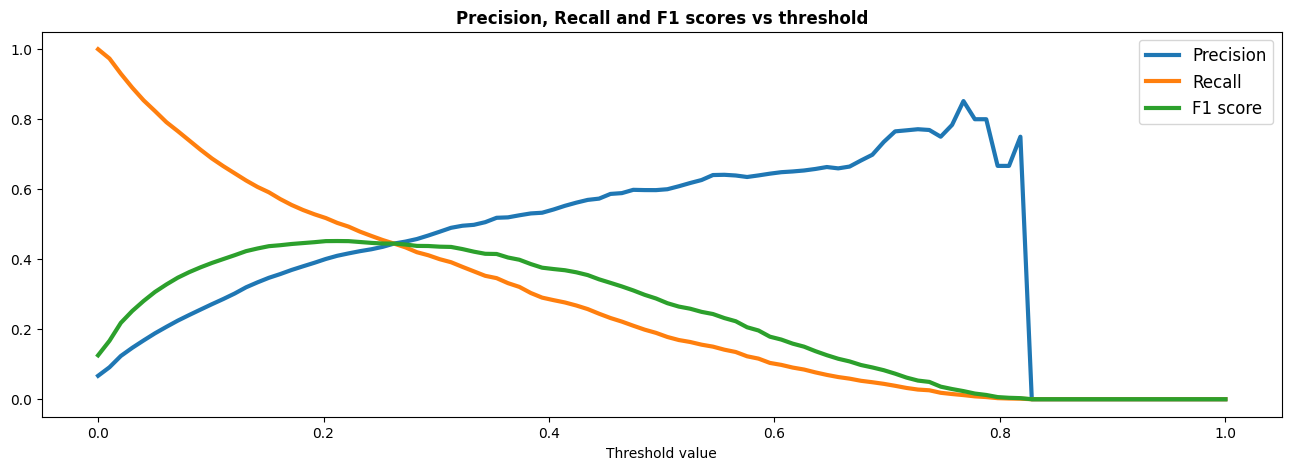

In [70]:
fig = plt.figure(figsize=(16, 5))
plt.plot(tr, p, linewidth=3)
plt.plot(tr, r, linewidth=3)
plt.plot(tr, f, linewidth=3)
plt.title("Precision, Recall and F1 scores vs threshold", weight="bold")
plt.xlabel("Threshold value")
plt.legend(['Precision', 'Recall', 'F1 score'], fontsize=12)
plt.show()

**From the graph we can see that it is fairly reasinble to leave the threshhold at the level Target_mean level of 0.06684 both in terms of Recall and a reasonable level of F1 score as well**

In [71]:
# By default threshhold is 0.5 BUT to increase the RECALL in OUR CREDIT SCORING we've chosen it to be rqual to Target mean level.
# Get probability predictions for the positive class
y_pred_proba = best_lgbm_model.predict_proba(X_test_scaled)[:, 1]
# Define your custom threshold
custom_threshold = 0.06684
# Apply the custom threshold to determine class labels
y_pred_custom = np.where(y_pred_proba >= custom_threshold, 1, 0)
y_pred_custom

array([0, 1, 0, ..., 0, 0, 1])

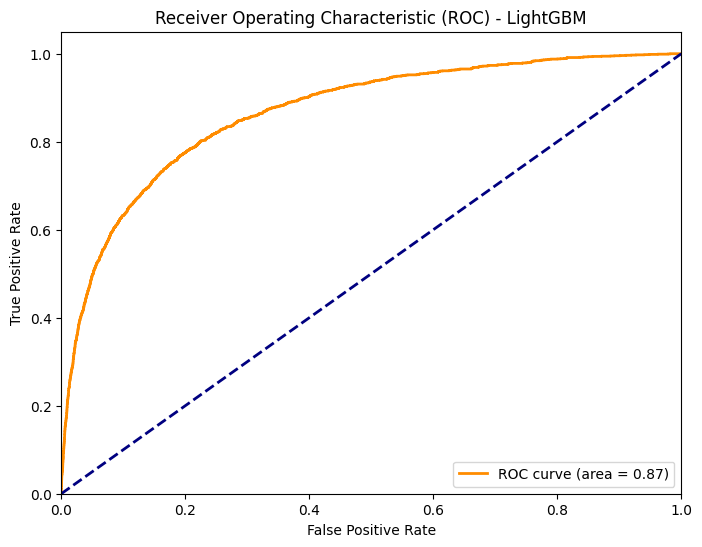

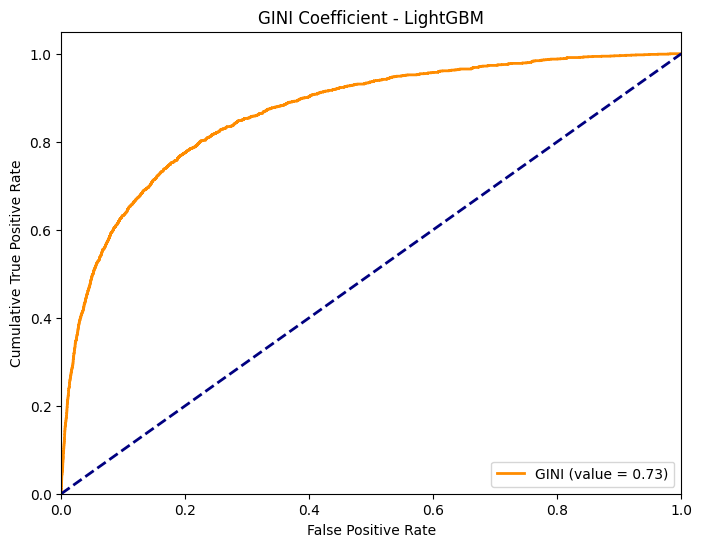

In [72]:
# Obtain probability scores using the best estimator
y_scores = RS_lgbm.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Calculating True Positive Rate and False Positive Rate for ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - LightGBM')
plt.legend(loc="lower right")
plt.show()

# GINI calculation
gini = 2 * roc_auc - 1

# Plotting the GINI curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='GINI (value = %0.2f)' % gini)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Cumulative True Positive Rate')
plt.title('GINI Coefficient - LightGBM')
plt.legend(loc="lower right")
plt.show()


LightGBM's results on the y_test set are even slightly higher. Which is great. And GINI is also reasonbly high (but without indicating averfitting).

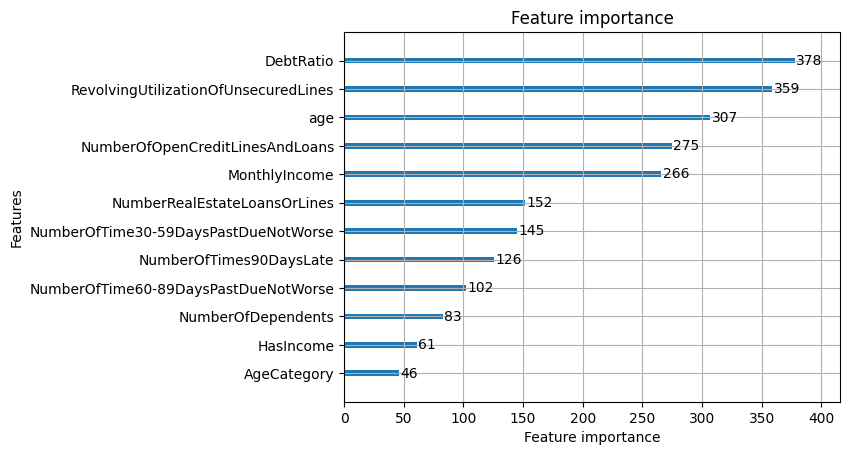

In [73]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming 'lgb_model' is your trained LightGBM model
lgb.plot_importance(best_lgbm_model)
plt.show()


In this chart:

- The x-axis represents the measure of feature importance, which is often calculated based on the average gain of the feature when it is used in trees for models like LightGBM, or the total reduction of the criterion brought by that feature for other models.
- The y-axis lists the features used in the model, with each bar corresponding to a feature.

The features are sorted in descending order of importance, with `DebtRatio` being the most important feature, followed by `RevolvingUtilizationOfUnsecuredLines`, and so on. The lengths of the bars represent the magnitude of the features' importance scores. For example, `DebtRatio` has the highest score of 378, indicating it is the most influential feature in this model for making predictions.

This kind of visualization is helpful in understanding which features the model is most reliant on, which can inform feature engineering, model interpretation, and provide insights into the domain of the problem being solved. If the model is over-relying on features that are not expected to be predictive based on domain knowledge, it may indicate issues like data leakage or overfitting.


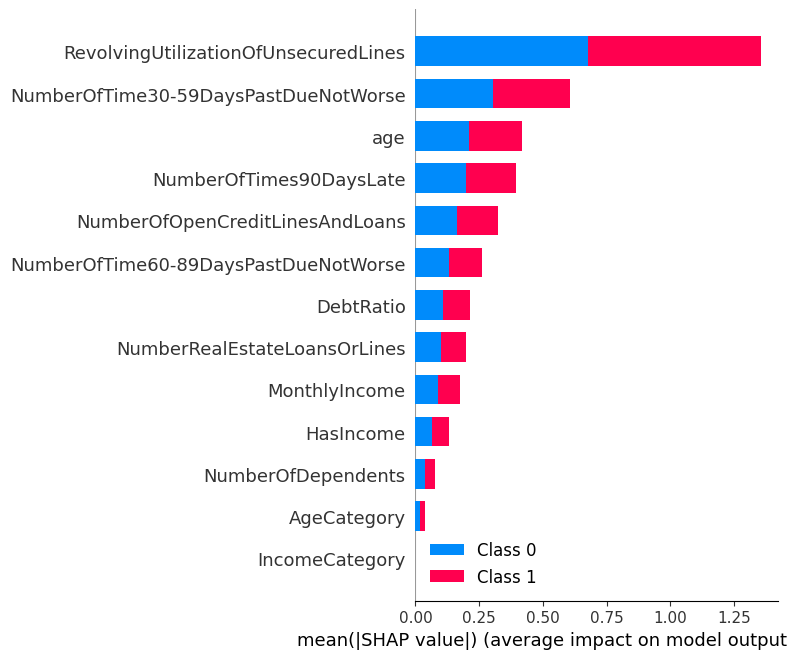

In [85]:
import shap
explainer = shap.TreeExplainer(best_lgbm_model)
shap_values = explainer.shap_values(X_train_scaled)
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train_scaled.columns)

SHAP (SHapley Additive exPlanations) values help to explain the output of machine learning models by quantifying the contribution of each feature to the prediction.

In the chart:

- Each row corresponds to a feature in the dataset.
- Two colors are used: blue and red, that represent two classes (Class 0 and Class 1) for a binary classification problem.
- The length of the bar represents the mean absolute SHAP value for each feature, which reflects the average impact of the feature on the model's predictions. A longer bar means the feature has a higher importance in determining the model output.
- Features are sorted by their importance, with `RevolvingUtilizationOfUnsecuredLines` being the most influential, followed by `NumberOfTime30-59DaysPastDueNotWorse`, and so forth.
- The blue bars (Class 0) and red bars (Class 1) show the direction and magnitude of the feature's impact on each class. For example, if blue bars extend to the right more than pink bars for a particular feature, this indicates that the feature positively influences the prediction of Class 0 over Class 1.

This kind of visualization is useful for understanding model behavior and can be particularly helpful in identifying which features drive the model's decisions, as well as in validating whether these influences align with domain knowledge and expectations. It also aids in ensuring fairness and debugging model predictions.


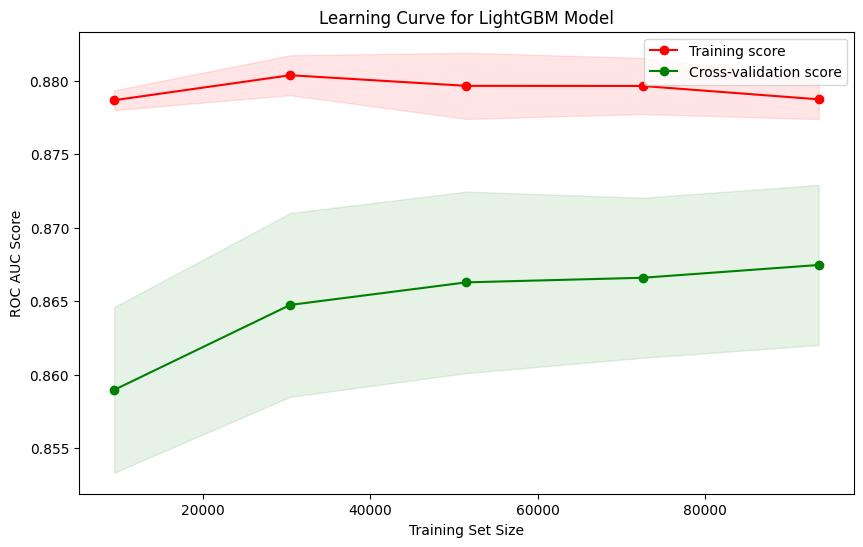

In [86]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_lgbm_model, X_train_scaled, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curve for LightGBM Model")
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC Score")
plt.legend(loc="best")
plt.show()


### Learning Curve graph for LightGBM Model:

- The model starts with high performance on the training set and maintains this as more data is added, which indicates that it is not overfitting to the training data.
- The cross-validation score increases with the training set size, suggesting that the model benefits from more data and is generalizing better as it learns from a larger dataset.
- The gap between the training and cross-validation scores is relatively small, which typically indicates good model generalization. If this gap were larger, it might suggest overfitting.
- Toward the right side of the graph, the cross-validation score plateaus, which might imply that adding more training data beyond a certain point does not lead to significant improvements in model performance on unseen data.

This kind of visualization is helpful in determining if more data might help the model perform better or if the model has reached a plateau where additional data does not significantly change the performance. It's also useful for diagnosing problems with model learning, such as overfitting or underfitting.


## Suggestions for Future Improvements

1. **Enhanced Feature Engineering:** Investigate the creation of more sophisticated features, possibly using domain knowledge or interaction terms, and assess their impact on model performance.

2. **Diverse Model Exploration:** Explore a wider range of models beyond logistic regression, such as random forests, gradient boosting machines, or neural networks, to compare performance.

3. **Model Ensembling:** Explore ensembling techniques, like stacking or blending, to combine predictions from multiple models, which could improve performance over individual models.
